In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preparation

In [2]:
data = pd.read_csv('D:\ML\Milestone1\Data_XY.csv')

In [3]:
x = data.iloc[:,:4186] #features
y = data['y'] # y ( h in our model)
x = np.array(x)

Text(0.5, 0.98, 'Two phases and phase transition point specified in 2D plots of some features')

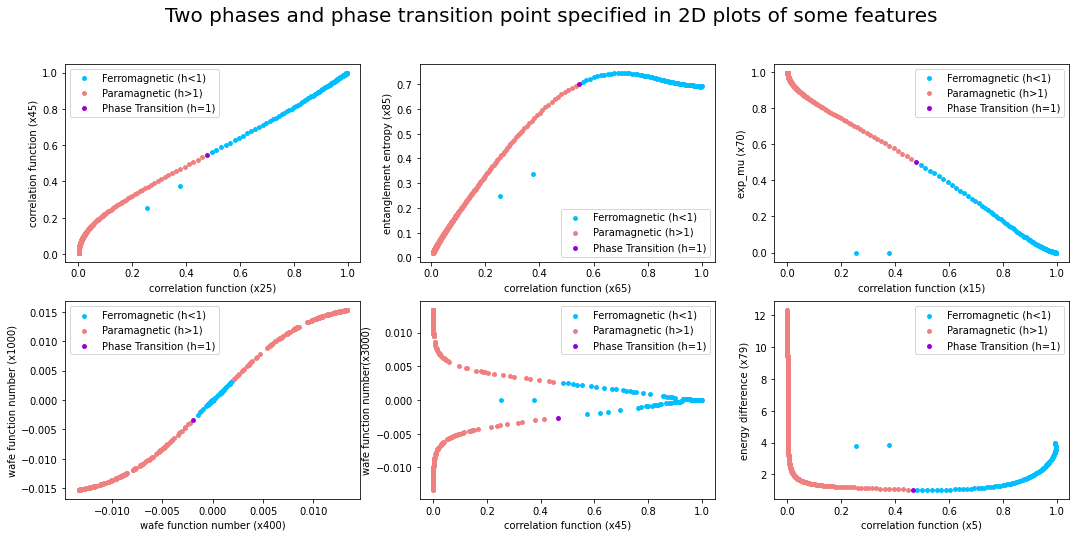

In [4]:
#two classes
fig, axes = plt.subplots(2, 3, figsize=(18, 8))

axes[0][0].scatter(x[y < 1][:,24], x[y < 1][:,39], color='deepskyblue', label='Ferromagnetic (h<1)',s=15) 
axes[0][0].scatter(x[y > 1][:,24], x[y > 1][:,39], color='lightcoral', label='Paramagnetic (h>1)',s=15)
axes[0][0].scatter(x[y == 1][:,24], x[y == 1][:,39], color='darkviolet', label='Phase Transition (h=1)',s=15)
axes[0][0].legend()
axes[0][0].set_xlabel('correlation function (x25)')
axes[0][0].set_ylabel('correlation function (x45)')
##
axes[1][0].scatter(x[y < 1][:,399], x[y < 1][:,999], color='deepskyblue', label='Ferromagnetic (h<1)',s=15) 
axes[1][0].scatter(x[y > 1][:,399], x[y > 1][:,999], color='lightcoral', label='Paramagnetic (h>1)',s=15)
axes[1][0].scatter(x[y == 1][:,399], x[y == 1][:,999], color='darkviolet', label='Phase Transition (h=1)',s=15)
axes[1][0].legend()
axes[1][0].set_xlabel('wafe function number (x400)')
axes[1][0].set_ylabel('wafe function number (x1000)')
##
axes[0][1].scatter(x[y < 1][:,64], x[y < 1][:,84], color='deepskyblue', label='Ferromagnetic (h<1)',s=15) 
axes[0][1].scatter(x[y > 1][:,64], x[y > 1][:,84], color='lightcoral', label='Paramagnetic (h>1)',s=15)
axes[0][1].scatter(x[y == 1][:,64], x[y == 1][:,84], color='darkviolet', label='Phase Transition (h=1)',s=15)
axes[0][1].legend()
axes[0][1].set_xlabel('correlation function (x65)')
axes[0][1].set_ylabel('entanglement entropy (x85)')
##
axes[1][1].scatter(x[y < 1][:,44], x[y < 1][:,2999], color='deepskyblue', label='Ferromagnetic (h<1)',s=15) 
axes[1][1].scatter(x[y > 1][:,44], x[y > 1][:,2999], color='lightcoral', label='Paramagnetic (h>1)',s=15)
axes[1][1].scatter(x[y == 1][:,44], x[y == 1][:,2999], color='darkviolet', label='Phase Transition (h=1)',s=15)
axes[1][1].legend()
axes[1][1].set_xlabel('correlation function (x45)')
axes[1][1].set_ylabel('wafe function number(x3000)')
axes[0][2].scatter(x[y < 1][:,14], x[y < 1][:,69], color='deepskyblue', label='Ferromagnetic (h<1)',s=15) 
axes[0][2].scatter(x[y > 1][:,14], x[y > 1][:,69], color='lightcoral', label='Paramagnetic (h>1)',s=15)
axes[0][2].scatter(x[y == 1][:,14], x[y == 1][:,69], color='darkviolet', label='Phase Transition (h=1)',s=15)
axes[0][2].legend()
axes[0][2].set_xlabel('correlation function (x15)')
axes[0][2].set_ylabel('exp_mu (x70)')
axes[1][2].scatter(x[y < 1][:,4], x[y < 1][:,78], color='deepskyblue', label='Ferromagnetic (h<1)',s=15) 
axes[1][2].scatter(x[y > 1][:,4], x[y > 1][:,78], color='lightcoral', label='Paramagnetic (h>1)',s=15)
axes[1][2].scatter(x[y == 1][:,4], x[y == 1][:,78], color='darkviolet', label='Phase Transition (h=1)',s=15)
axes[1][2].legend()
axes[1][2].set_xlabel('correlation function (x5)')
axes[1][2].set_ylabel('energy difference (x79)')
fig.suptitle(r"Two phases and phase transition point specified in 2D plots of some features",fontsize = 20)
#plt.savefig('Two classes.jpg',dpi=500)

In [5]:
#split the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25)  

# Model 1: KNN Regressor

## Training

In [6]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=10)

In [7]:
%%time
KNN.fit(x_train,y_train)

Wall time: 398 ms


KNeighborsRegressor(n_neighbors=10)

In [8]:
%%time
y_pred_KNN = KNN.predict(x_test)

Wall time: 253 ms


## Evaluation

In [9]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
##
MSEScore = mean_squared_error(y_test,y_pred_KNN)
print(f"mean squared error metric: {MSEScore}")
print()
##
r2Score = r2_score(y_test,y_pred_KNN)
print(f"r^2 metric: {r2Score}")
print()
##
rmsScore = mean_squared_error(y_test, y_pred_KNN, squared=False)
print(f"root mean squared_error metric: {rmsScore}")
print()
##
MAEScore = mean_absolute_error(y_test, y_pred_KNN)
print(f"mean absolute error metric: {MAEScore}")

mean squared error metric: 0.006538437499999995

r^2 metric: 0.9983516843061067

root mean squared_error metric: 0.08086060536503542

mean absolute error metric: 0.03472159090909083


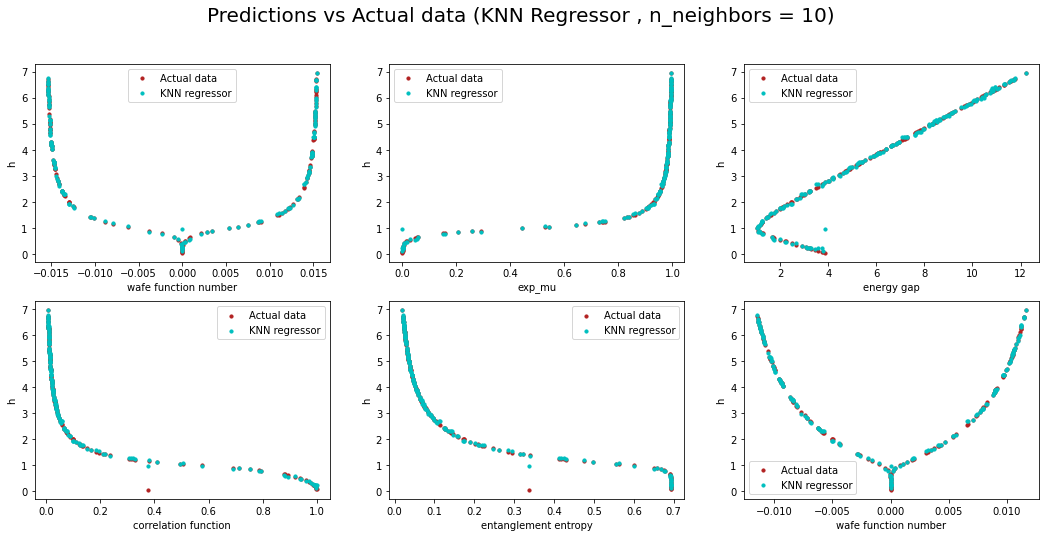

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes[0][0].scatter(x_test[:,300],y_test,s=10,label="Actual data",c='firebrick')
axes[0][0].scatter(x_test[:,300],y_pred_KNN,s=10, label="KNN regressor", c = 'c')
axes[0][0].legend()
axes[0][0].set_xlabel('wafe function number')
axes[0][0].set_ylabel('h')
##
axes[1][0].scatter(x_test[:,20],y_test,s=10,label="Actual data",c='firebrick')
axes[1][0].scatter(x_test[:,20],y_pred_KNN,s=10, label="KNN regressor", c = 'c')
axes[1][0].legend()
axes[1][0].set_xlabel('correlation function')
axes[1][0].set_ylabel('h')
##
axes[0][1].scatter(x_test[:,70],y_test,s=10,label="Actual data",c='firebrick')
axes[0][1].scatter(x_test[:,70],y_pred_KNN,s=10, label="KNN regressor", c = 'c')
axes[0][1].legend()
axes[0][1].set_xlabel('exp_mu')
axes[0][1].set_ylabel('h')
##
axes[1][1].scatter(x_test[:,88],y_test,s=10,label="Actual data",c='firebrick')
axes[1][1].scatter(x_test[:,88],y_pred_KNN,s=10, label="KNN regressor", c = 'c')
axes[1][1].legend()
axes[1][1].set_xlabel('entanglement entropy')
axes[1][1].set_ylabel('h')
##
axes[0][2].scatter(x_test[:,78],y_test,s=10,label="Actual data",c='firebrick')
axes[0][2].scatter(x_test[:,78],y_pred_KNN,s=10, label="KNN regressor", c = 'c')
axes[0][2].legend()
axes[0][2].set_xlabel('energy gap')
axes[0][2].set_ylabel('h')
##
axes[1][2].scatter(x_test[:,3500],y_test,s=10,label="Actual data",c='firebrick')
axes[1][2].scatter(x_test[:,3500],y_pred_KNN,s=10, label="KNN regressor", c = 'c')
axes[1][2].legend()
axes[1][2].set_xlabel('wafe function number')
axes[1][2].set_ylabel('h')
fig.suptitle("Predictions vs Actual data (KNN Regressor , n_neighbors = 10)",fontsize = 20)
plt.savefig('true_pred_knn.jpg',dpi=500)

## Tuning the complexity of KNN Regressor with validation curve

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 340 out of 340 | elapsed:  8.9min finished


Wall time: 8min 54s


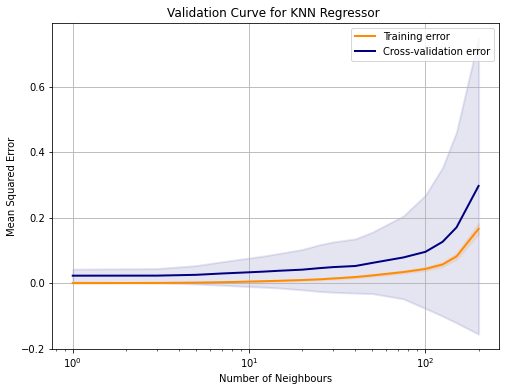

In [11]:
%%time
from sklearn.model_selection import validation_curve
k_list = [1,3,5,7,9, 12, 15, 20, 25, 30, 40, 50 , 75, 100, 125, 150 ,200]
train_scores, test_scores = validation_curve(KNeighborsRegressor(), x, y, 
                                              param_name="n_neighbors",
                                              param_range=k_list , cv=20, 
                                              scoring = 'neg_mean_squared_error',
                                              verbose=1)
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.grid()
plt.title("Validation Curve for KNN Regressor ")
plt.xlabel(r"Number of Neighbours")
plt.ylabel("Mean Squared Error")

lw = 2
plt.semilogx(k_list, train_scores_mean, label="Training error",
             color="darkorange", lw=lw)
plt.fill_between(k_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="darkorange", lw=lw)
plt.semilogx(k_list, test_scores_mean, label="Cross-validation error",
             color="navy", lw=lw)
plt.fill_between(k_list, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.savefig('knn_validation curve.jpg',dpi=500)

## Grid search to find the best Number of neighbors

In [12]:
from sklearn.model_selection import GridSearchCV
k_list = [1,2, 3, 5, 7, 10, 15, 20, 25, 30, 40, 50, 75, 100, 125, 150, 175, 200]
params = {'n_neighbors':k_list}
knn = KNeighborsRegressor()
knn_gs = GridSearchCV(knn, param_grid=params, verbose=1, cv=10, scoring='neg_mean_squared_error')
knn_gs.fit(x_train, y_train)
print("Best Number of Neighbours found on development set:")
print()
print( knn_gs.best_params_ )

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   49.7s finished


Best Number of Neighbours found on development set:

{'n_neighbors': 1}


In [13]:
gridsearch_knn = pd.DataFrame(knn_gs.cv_results_)
gridsearch_knn

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.196496,0.016710,0.041370,0.003878,1,{'n_neighbors': 1},-0.000349,-0.000315,-0.000300,-0.001247,-0.000383,-0.000558,-0.000383,-0.000417,-0.023710,-0.000304,-0.002797,0.006976,1
1,0.188511,0.004647,0.040290,0.001430,2,{'n_neighbors': 2},-0.000276,-0.000392,-0.000326,-0.001458,-0.000626,-0.000680,-0.000512,-0.000156,-0.024288,-0.000239,-0.002895,0.007140,2
2,0.187319,0.003215,0.041695,0.001164,3,{'n_neighbors': 3},-0.000399,-0.000509,-0.000297,-0.001667,-0.000529,-0.000931,-0.000530,-0.000279,-0.023965,-0.000341,-0.002945,0.007018,3
3,0.193993,0.002328,0.043386,0.001356,5,{'n_neighbors': 5},-0.000802,-0.000807,-0.000783,-0.001991,-0.000966,-0.001336,-0.000628,-0.000783,-0.052021,-0.000340,-0.006046,0.015331,4
4,0.200973,0.014146,0.049257,0.004618,7,{'n_neighbors': 7},-0.000854,-0.001534,-0.001285,-0.003108,-0.002227,-0.001883,-0.000955,-0.001309,-0.068195,-0.000569,-0.008192,0.020013,5
5,0.196798,0.009939,0.051263,0.004810,10,{'n_neighbors': 10},-0.001889,-0.001676,-0.002092,-0.004218,-0.003756,-0.003465,-0.001462,-0.002195,-0.080921,-0.001133,-0.010281,0.023567,6
6,0.201970,0.016042,0.057142,0.005261,15,{'n_neighbors': 15},-0.003028,-0.003779,-0.004066,-0.006535,-0.005764,-0.006227,-0.004192,-0.004126,-0.093845,-0.002552,-0.013411,0.026840,7
7,0.203777,0.026487,0.060033,0.004441,20,{'n_neighbors': 20},-0.005175,-0.007145,-0.006889,-0.010044,-0.007878,-0.009615,-0.007512,-0.005918,-0.098809,-0.003783,-0.016277,0.027569,8
8,0.202165,0.008494,0.066934,0.007157,25,{'n_neighbors': 25},-0.008101,-0.010871,-0.009103,-0.013517,-0.010534,-0.012765,-0.012896,-0.009289,-0.104737,-0.006544,-0.019836,0.028380,9
9,0.203072,0.010053,0.074387,0.004764,30,{'n_neighbors': 30},-0.009782,-0.017167,-0.012686,-0.017219,-0.013492,-0.017475,-0.020242,-0.012576,-0.109780,-0.008180,-0.023860,0.028859,10


## Learning Curve

In [14]:
def plot_learning_curve(estimator, X, y, axes=None, ylim=None, cv=None,n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(30,10))

    axes[0].set_title("Learning Curve")
    
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Mean Squared Error")


    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       scoring = 'neg_mean_squared_error',
                       return_times=True)
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training error")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation error")
    axes[0].legend(loc="best")


    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit times (s)")
    axes[1].set_title("Scalability of the model")


    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit times (s)")
    axes[2].set_ylabel("Mean Squared Error")
    axes[2].set_title("Performance of the model")


    return plt

Wall time: 3min 40s


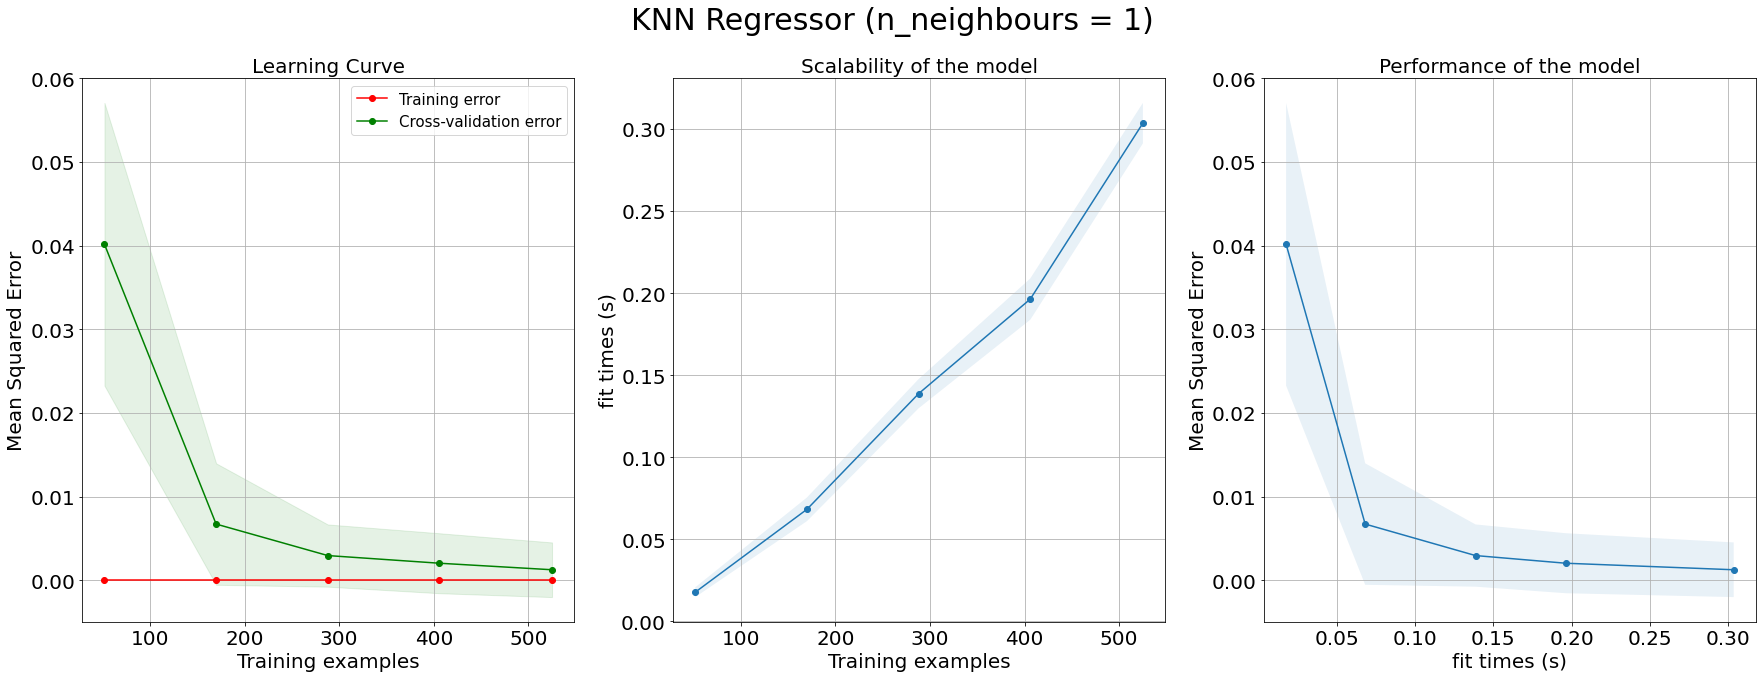

In [16]:
%%time
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 25% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.25, random_state=0)

estimator = KNeighborsRegressor(n_neighbors=1)
plot_learning_curve(estimator, X = x , y=y ,cv=cv)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.rc('axes',labelsize=20)
plt.rc('axes',titlesize=20)
plt.rc('legend',fontsize=15)
plt.suptitle(r"KNN Regressor (n_neighbours = 1)",fontsize=30)
plt.savefig('knn_learning_curves.jpg',dpi=500)

## Final fitting with best hyperparameters

In [17]:
KNN = KNeighborsRegressor(n_neighbors=1)

In [18]:
%%time
KNN.fit(x_train,y_train)

Wall time: 256 ms


KNeighborsRegressor(n_neighbors=1)

In [19]:
%%time
y_pred_KNN = KNN.predict(x_test)

Wall time: 146 ms


In [20]:
MSEScore = mean_squared_error(y_test,y_pred_KNN)
print(f"mean squared error metric: {MSEScore}")
print()
##
r2Score = r2_score(y_test,y_pred_KNN)
print(f"r^2 metric: {r2Score}")
print()
##
rmsScore = mean_squared_error(y_test, y_pred_KNN, squared=False)
print(f"root mean squared_error metric: {rmsScore}")
print()
##
MAEScore = mean_absolute_error(y_test, y_pred_KNN)
print(f"mean absolute error metric: {MAEScore}")

mean squared error metric: 0.0004386363636363633

r^2 metric: 0.9998894214096113

root mean squared_error metric: 0.020943647333651397

mean absolute error metric: 0.015340909090909072


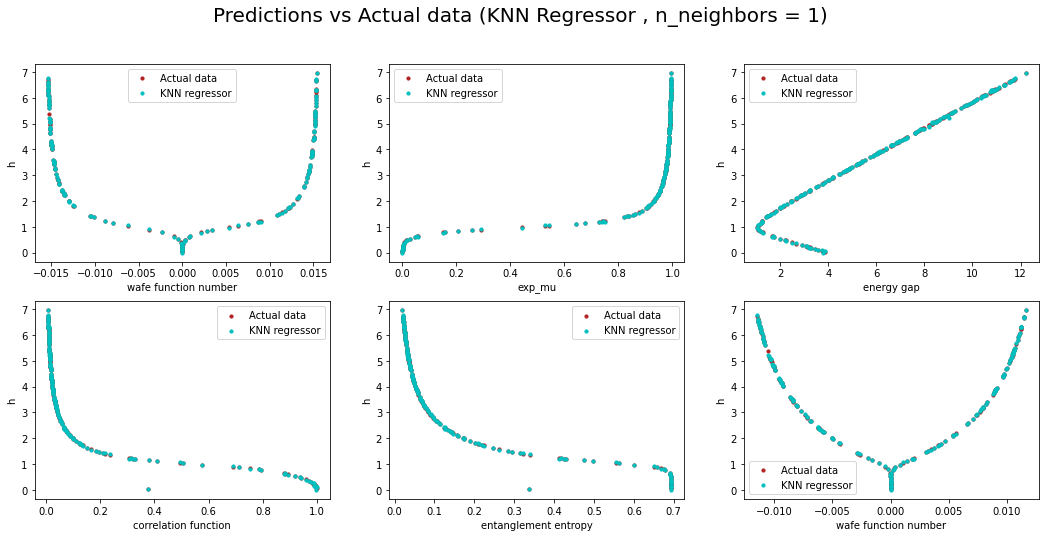

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes[0][0].scatter(x_test[:,300],y_test,s=10,label="Actual data",c='firebrick')
axes[0][0].scatter(x_test[:,300],y_pred_KNN,s=10, label="KNN regressor", c = 'c')
axes[0][0].legend()
axes[0][0].set_xlabel('wafe function number')
axes[0][0].set_ylabel('h')
##
axes[1][0].scatter(x_test[:,20],y_test,s=10,label="Actual data",c='firebrick')
axes[1][0].scatter(x_test[:,20],y_pred_KNN,s=10, label="KNN regressor", c = 'c')
axes[1][0].legend()
axes[1][0].set_xlabel('correlation function')
axes[1][0].set_ylabel('h')
##
axes[0][1].scatter(x_test[:,70],y_test,s=10,label="Actual data",c='firebrick')
axes[0][1].scatter(x_test[:,70],y_pred_KNN,s=10, label="KNN regressor", c = 'c')
axes[0][1].legend()
axes[0][1].set_xlabel('exp_mu')
axes[0][1].set_ylabel('h')
##
axes[1][1].scatter(x_test[:,88],y_test,s=10,label="Actual data",c='firebrick')
axes[1][1].scatter(x_test[:,88],y_pred_KNN,s=10, label="KNN regressor", c = 'c')
axes[1][1].legend()
axes[1][1].set_xlabel('entanglement entropy')
axes[1][1].set_ylabel('h')
##
axes[0][2].scatter(x_test[:,78],y_test,s=10,label="Actual data",c='firebrick')
axes[0][2].scatter(x_test[:,78],y_pred_KNN,s=10, label="KNN regressor", c = 'c')
axes[0][2].legend()
axes[0][2].set_xlabel('energy gap')
axes[0][2].set_ylabel('h')
##
axes[1][2].scatter(x_test[:,3500],y_test,s=10,label="Actual data",c='firebrick')
axes[1][2].scatter(x_test[:,3500],y_pred_KNN,s=10, label="KNN regressor", c = 'c')
axes[1][2].legend()
axes[1][2].set_xlabel('wafe function number')
axes[1][2].set_ylabel('h')
fig.suptitle("Predictions vs Actual data (KNN Regressor , n_neighbors = 1)",fontsize = 20)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.rc('axes',labelsize=10)
plt.rc('axes',titlesize=10)
plt.rc('legend',fontsize=10)
plt.savefig('true_pred_knn_best.jpg',dpi=500)

# Model 2: DecisionTree Regressor

## Training

In [23]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=5)

In [24]:
%%time
DT.fit(x_train,y_train)

Wall time: 1.15 s


DecisionTreeRegressor(max_depth=5)

In [25]:
%%time
y_pred_DT = DT.predict(x_test)

Wall time: 19.9 ms


## Evaluation

In [26]:
MSEScore = mean_squared_error(y_test, y_pred_DT)
print(f"mean squared_error metric: {MSEScore}")
print()
##
r2Score = r2_score(y_test, y_pred_DT)
print(f"r^2 metric: {r2Score}")
print()
##
rmsScore = mean_squared_error(y_test, y_pred_DT, squared=False)
print(f"root mean squared_error metric: {rmsScore}")
print()
##
MAEScore = mean_absolute_error(y_test, y_pred_DT)
print(f"mean absolute error metric: {MAEScore}")

mean squared_error metric: 0.005093414464766775

r^2 metric: 0.9987159692208148

root mean squared_error metric: 0.07136816142207093

mean absolute error metric: 0.06018369526607723


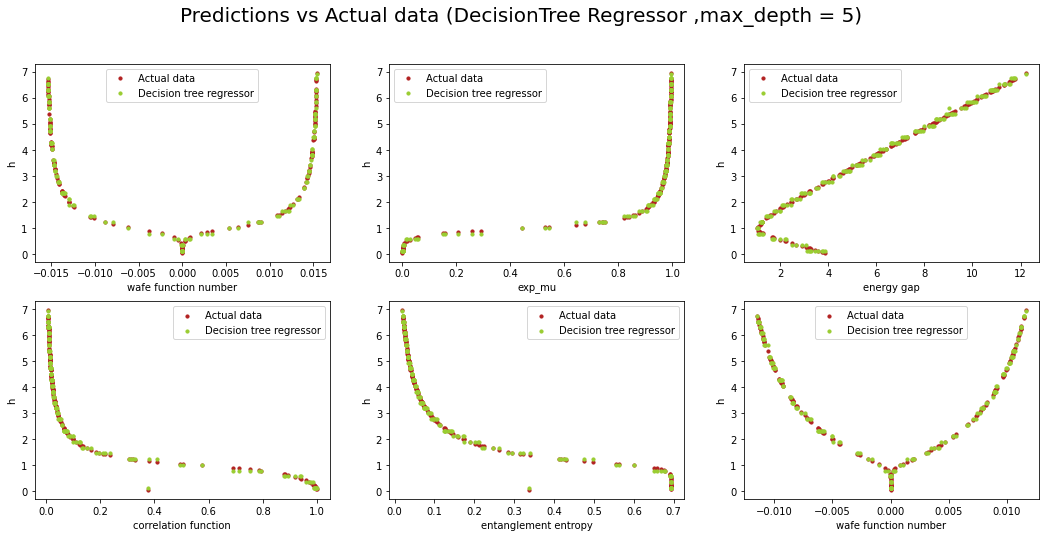

In [27]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes[0][0].scatter(x_test[:,300],y_test,s=10,label="Actual data",c='firebrick')
axes[0][0].scatter(x_test[:,300],y_pred_DT,s=10, label="Decision tree regressor", c = 'yellowgreen')
axes[0][0].legend()
axes[0][0].set_xlabel('wafe function number')
axes[0][0].set_ylabel('h')
axes[1][0].scatter(x_test[:,20],y_test,s=10,label="Actual data",c='firebrick')
axes[1][0].scatter(x_test[:,20],y_pred_DT,s=10, label="Decision tree regressor", c = 'yellowgreen')
axes[1][0].legend()
axes[1][0].set_xlabel('correlation function')
axes[1][0].set_ylabel('h')
axes[0][1].scatter(x_test[:,70],y_test,s=10,label="Actual data",c='firebrick')
axes[0][1].scatter(x_test[:,70],y_pred_DT,s=10, label="Decision tree regressor", c = 'yellowgreen')
axes[0][1].legend()
axes[0][1].set_xlabel('exp_mu')
axes[0][1].set_ylabel('h')
axes[1][1].scatter(x_test[:,88],y_test,s=10,label="Actual data",c='firebrick')
axes[1][1].scatter(x_test[:,88],y_pred_DT,s=10, label="Decision tree regressor", c = 'yellowgreen')
axes[1][1].legend()
axes[1][1].set_xlabel('entanglement entropy')
axes[1][1].set_ylabel('h')
axes[0][2].scatter(x_test[:,78],y_test,s=10,label="Actual data",c='firebrick')
axes[0][2].scatter(x_test[:,78],y_pred_DT,s=10, label="Decision tree regressor", c = 'yellowgreen')
axes[0][2].legend()
axes[0][2].set_xlabel('energy gap')
axes[0][2].set_ylabel('h')
axes[1][2].scatter(x_test[:,3500],y_test,s=10,label="Actual data",c='firebrick')
axes[1][2].scatter(x_test[:,3500],y_pred_DT,s=10, label="Decision tree regressor", c = 'yellowgreen')
axes[1][2].legend()
axes[1][2].set_xlabel('wafe function number')
axes[1][2].set_ylabel('h')
fig.suptitle("Predictions vs Actual data (DecisionTree Regressor ,max_depth = 5)",fontsize = 20)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.rc('axes',labelsize=10)
plt.rc('axes',titlesize=10)
plt.rc('legend',fontsize=10)
plt.savefig('true_pred_dt.jpg',dpi=500)

## Tuning the complexity of DecisionTree Regressor with validation curve

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 440 out of 440 | elapsed:  2.8min finished


Wall time: 2min 52s


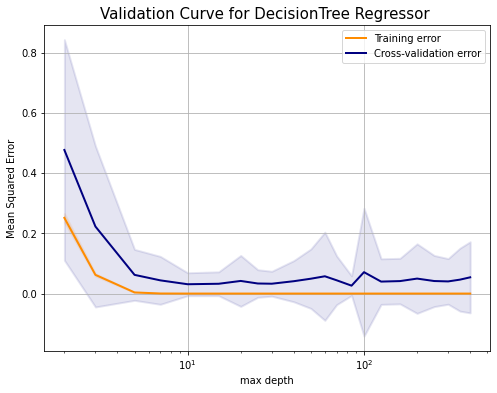

In [28]:
%%time
from sklearn.model_selection import validation_curve
depth_list = [2,3,5,7,10,15,20,25,30,40,50,60,70,85,100,125,160,200,250,300,350,400]
train_scores, test_scores = validation_curve(DecisionTreeRegressor(), x, y, 
                                              param_name="max_depth",
                                              param_range=depth_list  , cv=20, 
                                              scoring = 'neg_mean_squared_error',
                                              verbose=1, n_jobs=-1
                                             )
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.grid()
plt.title("Validation Curve for DecisionTree Regressor ",fontsize = 15)
plt.xlabel(r"max depth")
plt.ylabel("Mean Squared Error")

lw = 2
plt.semilogx(depth_list, train_scores_mean, label="Training error",
             color="darkorange", lw=lw)
plt.fill_between(depth_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="darkorange", lw=lw)
plt.semilogx(depth_list, test_scores_mean, label="Cross-validation error",
             color="navy", lw=lw)
plt.fill_between(depth_list, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.rc('axes',labelsize=20)
plt.rc('axes',titlesize=20)
plt.rc('legend',fontsize=15)
plt.savefig('DT_validation curve.jpg',dpi=500)

## Grid search to find the best hyperparameters

In [29]:
parameters = [{'splitter': ['best','random'], 'max_depth': [5,7,10,15,20,25,30,40,50,60,70,85,100]}]

In [30]:
DT = DecisionTreeRegressor()
DT_gs = GridSearchCV(DT, parameters, scoring= 'neg_mean_squared_error', cv=10)
DT_gs.fit(x_train,y_train)
print("Best parameters set found on development set:")
print()
print( DT_gs.best_params_ )

Best parameters set found on development set:

{'max_depth': 30, 'splitter': 'random'}


In [31]:
gridsearch_dt = pd.DataFrame(DT_gs.cv_results_)
gridsearch_dt = gridsearch_dt.drop(columns=['mean_score_time','std_score_time','params','split0_test_score','split1_test_score','split2_test_score','split3_test_score','split4_test_score'])
gridsearch_dt

,mean_fit_time,std_fit_time,param_max_depth,param_splitter,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.415517,0.022387,5,best,-0.005778,-0.005730,-0.004987,-0.009025,-0.004879,-0.005953,0.001576,21
1,0.095944,0.006334,5,random,-0.005699,-0.006620,-0.006218,-0.063364,-0.008219,-0.011786,0.017216,26
2,0.500665,0.033337,7,best,-0.001126,-0.001004,-0.000807,-0.024936,-0.000885,-0.003781,0.007163,17
3,0.141851,0.008636,7,random,-0.000645,-0.001385,-0.000619,-0.024962,-0.000544,-0.003514,0.007206,15
4,0.623741,0.032917,10,best,-0.000513,-0.000798,-0.001148,-0.022340,-0.000592,-0.003263,0.006497,11
5,0.243189,0.017630,10,random,-0.000358,-0.001200,-0.000354,-0.008631,-0.000273,-0.001421,0.002432,2
6,0.629180,0.028228,15,best,-0.000513,-0.000813,-0.000537,-0.012506,-0.000592,-0.002234,0.003675,8
7,0.230694,0.015000,15,random,-0.000377,-0.000396,-0.000250,-0.025098,-0.000406,-0.003366,0.007298,12
8,0.596198,0.033829,20,best,-0.000500,-0.000904,-0.000569,-0.007265,-0.000592,-0.001686,0.002303,3
9,0.220090,0.012889,20,random,-0.000465,-0.000417,-0.000227,-0.050983,-0.000381,-0.005884,0.015066,20


Wall time: 1min 24s


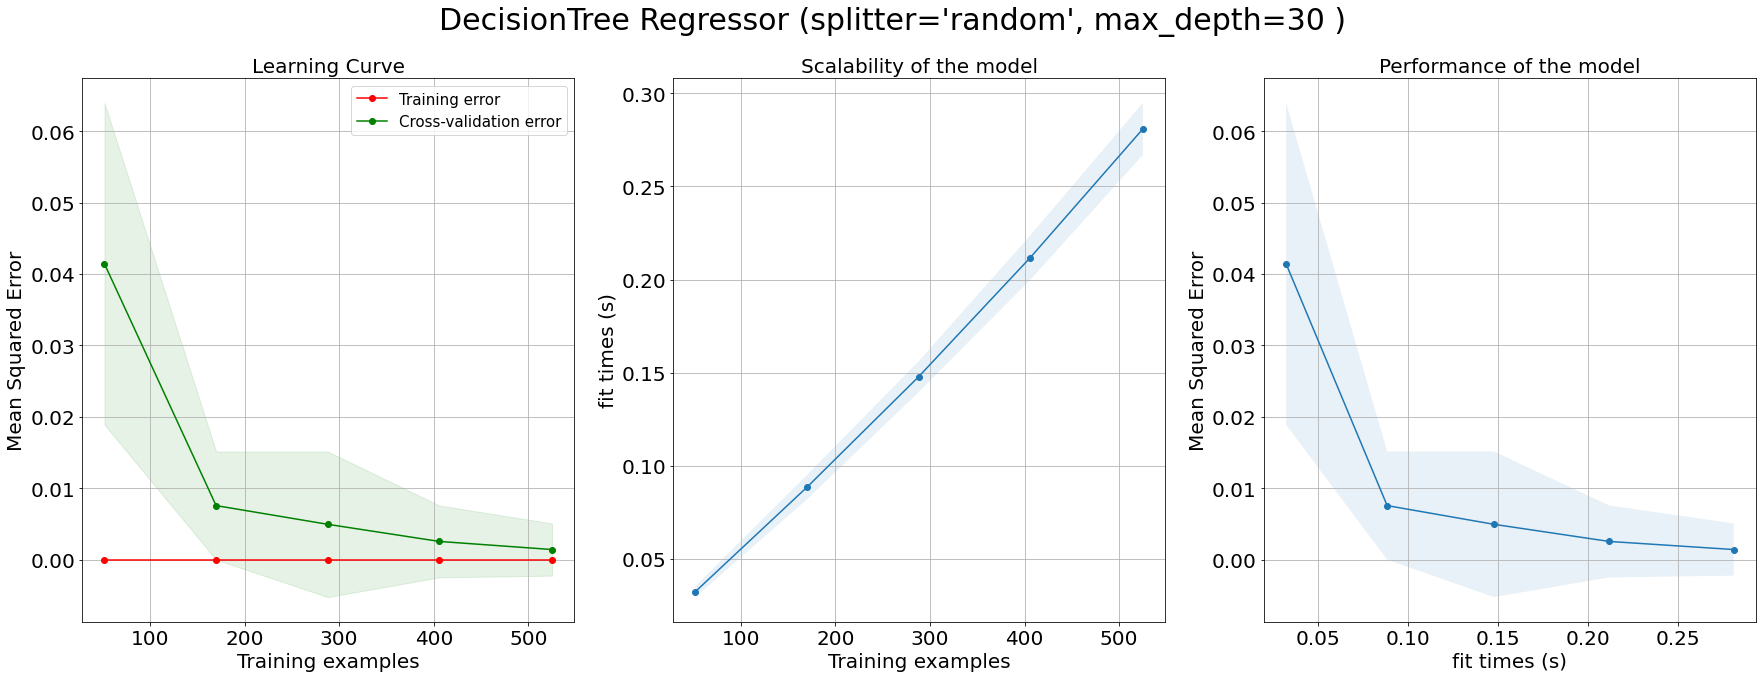

In [33]:
%%time
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 25% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.25, random_state=0)

estimator = DecisionTreeRegressor(splitter='random',max_depth=30)
plot_learning_curve(estimator, X = x , y=y ,cv=cv)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.rc('axes',labelsize=20)
plt.rc('axes',titlesize=20)
plt.rc('legend',fontsize=15)
plt.suptitle(r"DecisionTree Regressor (splitter='random', max_depth=30 )",fontsize=30)
plt.savefig('DecisionTree_learning_curves.jpg',dpi=500)

## Final fitting with best hyperparameters

In [34]:
DT = DecisionTreeRegressor(splitter='random',max_depth=30)

In [35]:
%%time
DT.fit(x_train,y_train)

Wall time: 280 ms


DecisionTreeRegressor(max_depth=30, splitter='random')

In [36]:
%%time
y_pred_DT = DT.predict(x_test)

Wall time: 6.98 ms


In [37]:
MSEScore = mean_squared_error(y_test, y_pred_DT)
print(f"mean squared_error metric: {MSEScore}")
print()
##
r2Score = r2_score(y_test, y_pred_DT)
print(f"r^2 metric: {r2Score}")
print()
##
rmsScore = mean_squared_error(y_test, y_pred_DT, squared=False)
print(f"root mean squared_error metric: {rmsScore}")
print()
##
MAEScore = mean_absolute_error(y_test, y_pred_DT)
print(f"mean absolute error metric: {MAEScore}")

mean squared_error metric: 0.0003238636363636372

r^2 metric: 0.9999183551858529

root mean squared_error metric: 0.017996211722571983

mean absolute error metric: 0.015340909090909117


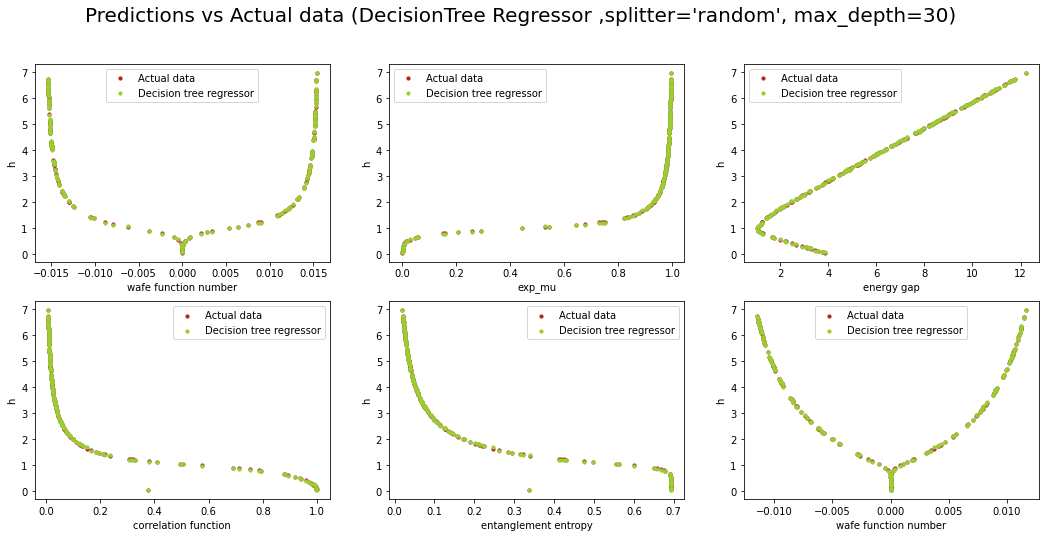

In [39]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes[0][0].scatter(x_test[:,300],y_test,s=10,label="Actual data",c='firebrick')
axes[0][0].scatter(x_test[:,300],y_pred_DT,s=10, label="Decision tree regressor", c = 'yellowgreen')
axes[0][0].legend()
axes[0][0].set_xlabel('wafe function number')
axes[0][0].set_ylabel('h')
axes[1][0].scatter(x_test[:,20],y_test,s=10,label="Actual data",c='firebrick')
axes[1][0].scatter(x_test[:,20],y_pred_DT,s=10, label="Decision tree regressor", c = 'yellowgreen')
axes[1][0].legend()
axes[1][0].set_xlabel('correlation function')
axes[1][0].set_ylabel('h')
axes[0][1].scatter(x_test[:,70],y_test,s=10,label="Actual data",c='firebrick')
axes[0][1].scatter(x_test[:,70],y_pred_DT,s=10, label="Decision tree regressor", c = 'yellowgreen')
axes[0][1].legend()
axes[0][1].set_xlabel('exp_mu')
axes[0][1].set_ylabel('h')
axes[1][1].scatter(x_test[:,88],y_test,s=10,label="Actual data",c='firebrick')
axes[1][1].scatter(x_test[:,88],y_pred_DT,s=10, label="Decision tree regressor", c = 'yellowgreen')
axes[1][1].legend()
axes[1][1].set_xlabel('entanglement entropy')
axes[1][1].set_ylabel('h')
axes[0][2].scatter(x_test[:,78],y_test,s=10,label="Actual data",c='firebrick')
axes[0][2].scatter(x_test[:,78],y_pred_DT,s=10, label="Decision tree regressor", c = 'yellowgreen')
axes[0][2].legend()
axes[0][2].set_xlabel('energy gap')
axes[0][2].set_ylabel('h')
axes[1][2].scatter(x_test[:,3500],y_test,s=10,label="Actual data",c='firebrick')
axes[1][2].scatter(x_test[:,3500],y_pred_DT,s=10, label="Decision tree regressor", c = 'yellowgreen')
axes[1][2].legend()
axes[1][2].set_xlabel('wafe function number')
axes[1][2].set_ylabel('h')
fig.suptitle("Predictions vs Actual data (DecisionTree Regressor ,splitter='random', max_depth=30)",fontsize = 20)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.rc('axes',labelsize=10)
plt.rc('axes',titlesize=10)
plt.rc('legend',fontsize=10)
plt.savefig('true_pred_dt_best.jpg',dpi=500)

# Model 3: Gaussian Process Regressor

## Training

In [40]:
from sklearn.gaussian_process import GaussianProcessRegressor
Gaussian_Process_Reg = GaussianProcessRegressor(alpha=1)

In [41]:
%%time
Gaussian_Process_Reg.fit(x_train,y_train)

Wall time: 2.11 s


GaussianProcessRegressor(alpha=1)

In [42]:
%%time
y_pred_GPR = Gaussian_Process_Reg.predict(x_test)

Wall time: 525 ms


In [43]:
MSEScore = mean_squared_error(y_test, y_pred_GPR)
print(f"mean squared_error metric: {MSEScore}")
print()
##
r2Score = r2_score(y_test, y_pred_GPR)
print(f"r^2 metric: {r2Score}")
print()
##
rmsScore = mean_squared_error(y_test, y_pred_GPR, squared=False)
print(f"root mean squared_error metric: {rmsScore}")
print()
##
MAEScore = mean_absolute_error(y_test, y_pred_GPR)
print(f"mean absolute error metric: {MAEScore}")

mean squared_error metric: 0.010371282715614015

r^2 metric: 0.9973854383304953

root mean squared_error metric: 0.10183949487116487

mean absolute error metric: 0.07790502455471233


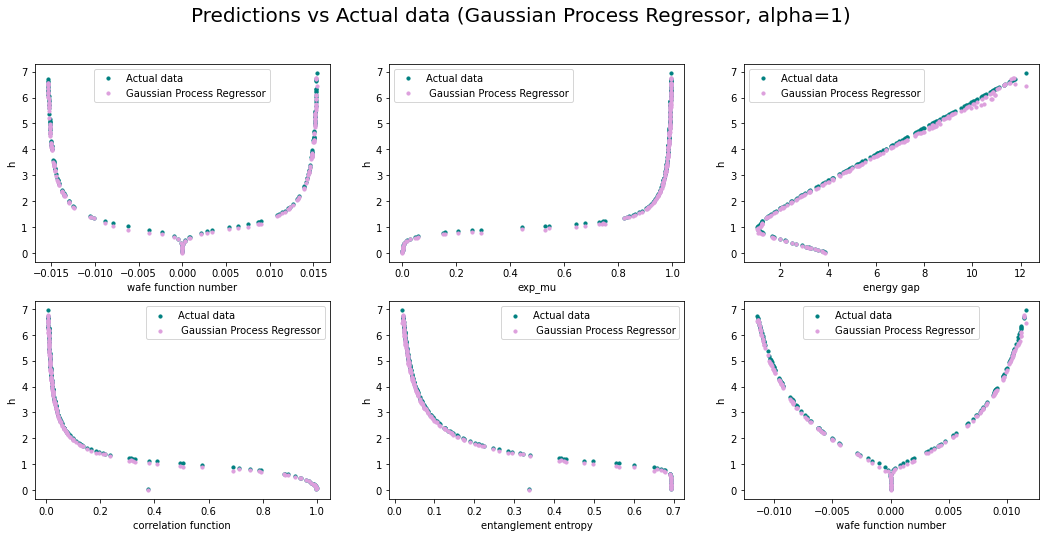

In [44]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes[0][0].scatter(x_test[:,300],y_test,s=10,label="Actual data",c='teal')
axes[0][0].scatter(x_test[:,300],y_pred_GPR,s=10, label="Gaussian Process Regressor", c = 'plum')
axes[0][0].legend()
axes[0][0].set_xlabel('wafe function number')
axes[0][0].set_ylabel('h')
axes[1][0].scatter(x_test[:,20],y_test,s=10,label="Actual data",c='teal')
axes[1][0].scatter(x_test[:,20],y_pred_GPR,s=10, label=" Gaussian Process Regressor", c = 'plum')
axes[1][0].legend()
axes[1][0].set_xlabel('correlation function')
axes[1][0].set_ylabel('h')
axes[0][1].scatter(x_test[:,70],y_test,s=10,label="Actual data",c='teal')
axes[0][1].scatter(x_test[:,70],y_pred_GPR,s=10, label=" Gaussian Process Regressor", c = 'plum')
axes[0][1].legend()
axes[0][1].set_xlabel('exp_mu')
axes[0][1].set_ylabel('h')
axes[1][1].scatter(x_test[:,88],y_test,s=10,label="Actual data",c='teal')
axes[1][1].scatter(x_test[:,88],y_pred_GPR,s=10, label=" Gaussian Process Regressor", c = 'plum')
axes[1][1].legend()
axes[1][1].set_xlabel('entanglement entropy')
axes[1][1].set_ylabel('h')
axes[0][2].scatter(x_test[:,78],y_test,s=10,label="Actual data",c='teal')
axes[0][2].scatter(x_test[:,78],y_pred_GPR,s=10, label="Gaussian Process Regressor", c = 'plum')
axes[0][2].legend()
axes[0][2].set_xlabel('energy gap')
axes[0][2].set_ylabel('h')
axes[1][2].scatter(x_test[:,3500],y_test,s=10,label="Actual data",c='teal')
axes[1][2].scatter(x_test[:,3500],y_pred_GPR,s=10, label="Gaussian Process Regressor", c = 'plum')
axes[1][2].legend()
axes[1][2].set_xlabel('wafe function number')
axes[1][2].set_ylabel('h')
fig.suptitle("Predictions vs Actual data (Gaussian Process Regressor, alpha=1)",fontsize = 20)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.rc('axes',labelsize=10)
plt.rc('axes',titlesize=10)
plt.rc('legend',fontsize=10)
plt.savefig('true_pred_gpr.jpg',dpi=500)

## Tuning the complexity of Gaussian Process Regressor with validation curve

Wall time: 23min 33s


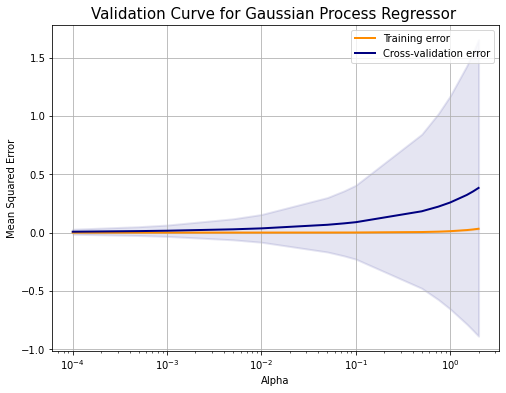

In [45]:
%%time
from sklearn.model_selection import validation_curve
alpha_list = [0.0001,0.0005,0.001,0.005,0.01,0.05,0.075,0.1,0.5,0.75,1,1.5,1.75,2]
train_scores, test_scores = validation_curve(GaussianProcessRegressor(), x, y, 
                                              param_name="alpha",
                                              param_range=alpha_list  , cv=20, 
                                              scoring = 'neg_mean_squared_error',
                                              n_jobs=1
                                             )
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.grid()
plt.title("Validation Curve for Gaussian Process Regressor ",fontsize = 15)
plt.xlabel(r"Alpha")
plt.ylabel("Mean Squared Error")

lw = 2
plt.semilogx(alpha_list, train_scores_mean, label="Training error",
             color="darkorange", lw=lw)
plt.fill_between(alpha_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="darkorange", lw=lw)
plt.semilogx(alpha_list, test_scores_mean, label="Cross-validation error",
             color="navy", lw=lw)
plt.fill_between(alpha_list, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.rc('axes',labelsize=20)
plt.rc('axes',titlesize=20)
plt.rc('legend',fontsize=15)
plt.savefig('GPR_validation curve.jpg',dpi=500)

## Grid search to find the best hyperparameters

In [46]:
%%time
from sklearn.model_selection import GridSearchCV
alpha_list = [0.0001,0.0005,0.001,0.005,0.01,0.05,0.075,0.1,0.5,0.75,1,1.5,1.75,2]
params = {'alpha':alpha_list}
gpr = GaussianProcessRegressor()
gpr_gs = GridSearchCV(gpr, param_grid=params, verbose=1, cv=10, scoring='neg_mean_squared_error')
gpr_gs.fit(x_train, y_train)
print("Best Alpha found on development set:")
print()
print( gpr_gs.best_params_ )

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:  7.7min finished


Best Alpha found on development set:

{'alpha': 0.0001}
Wall time: 7min 43s


In [47]:
gridsearch_gpr  = pd.DataFrame(gpr_gs.cv_results_)
gridsearch_gpr 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,3.017476,0.155507,0.358834,0.012137,0.0001,{'alpha': 0.0001},-1.364262e-07,-5.024492e-07,-2.093580e-07,-0.000005,-0.000002,-0.000065,-0.000002,-2.911693e-07,-0.000044,-1.660966e-07,-0.000012,0.000022,1
1,2.873781,0.112381,0.361214,0.015617,0.0005,{'alpha': 0.0005},-8.538092e-07,-4.109338e-06,-6.308664e-07,-0.000011,-0.000003,-0.000242,-0.000010,-1.468692e-06,-0.000045,-4.324563e-07,-0.000032,0.000071,2
2,3.058876,0.133527,0.375888,0.017954,0.001,{'alpha': 0.001},-1.528666e-06,-9.372864e-06,-1.502944e-06,-0.000019,-0.000004,-0.000419,-0.000020,-2.520138e-06,-0.000046,-9.801941e-07,-0.000052,0.000123,3
3,3.227888,0.327623,0.384912,0.069040,0.005,{'alpha': 0.005},-3.000239e-06,-5.187090e-05,-8.323126e-06,-0.000074,-0.000013,-0.001327,-0.000089,-1.123561e-05,-0.000055,-6.854268e-06,-0.000164,0.000389,4
4,2.914588,0.128132,0.347079,0.031875,0.01,{'alpha': 0.01},-3.455885e-06,-9.838921e-05,-1.505357e-05,-0.000147,-0.000021,-0.002113,-0.000178,-2.652375e-05,-0.000067,-1.263707e-05,-0.000268,0.000618,5
5,2.855182,0.036670,0.358195,0.010134,0.05,{'alpha': 0.05},-5.015596e-05,-3.704932e-04,-1.082561e-04,-0.000893,-0.000183,-0.006144,-0.001108,-2.049558e-04,-0.000177,-5.640007e-05,-0.000930,0.001772,6
6,2.869607,0.031927,0.359409,0.007655,0.075,{'alpha': 0.075},-1.030477e-04,-5.240077e-04,-1.918075e-04,-0.001426,-0.000342,-0.008079,-0.001797,-3.485847e-04,-0.000280,-9.036881e-05,-0.001318,0.002319,7
7,2.851739,0.041442,0.352787,0.011251,0.1,{'alpha': 0.1},-1.664082e-04,-6.896439e-04,-2.895138e-04,-0.001990,-0.000520,-0.009850,-0.002536,-5.145888e-04,-0.000416,-1.298116e-04,-0.001710,0.002819,8
8,2.913915,0.100777,0.360949,0.008642,0.5,{'alpha': 0.5},-2.101470e-03,-6.662780e-03,-3.949157e-03,-0.013524,-0.004153,-0.033131,-0.018759,-5.616647e-03,-0.005722,-1.649918e-03,-0.009527,0.009346,9
9,2.883817,0.065678,0.352129,0.007553,0.75,{'alpha': 0.75},-4.229143e-03,-1.351867e-02,-8.047196e-03,-0.022780,-0.007317,-0.046937,-0.032105,-1.066095e-02,-0.010995,-3.593790e-03,-0.016018,0.013241,10


## Learning Curve

Wall time: 30min 24s


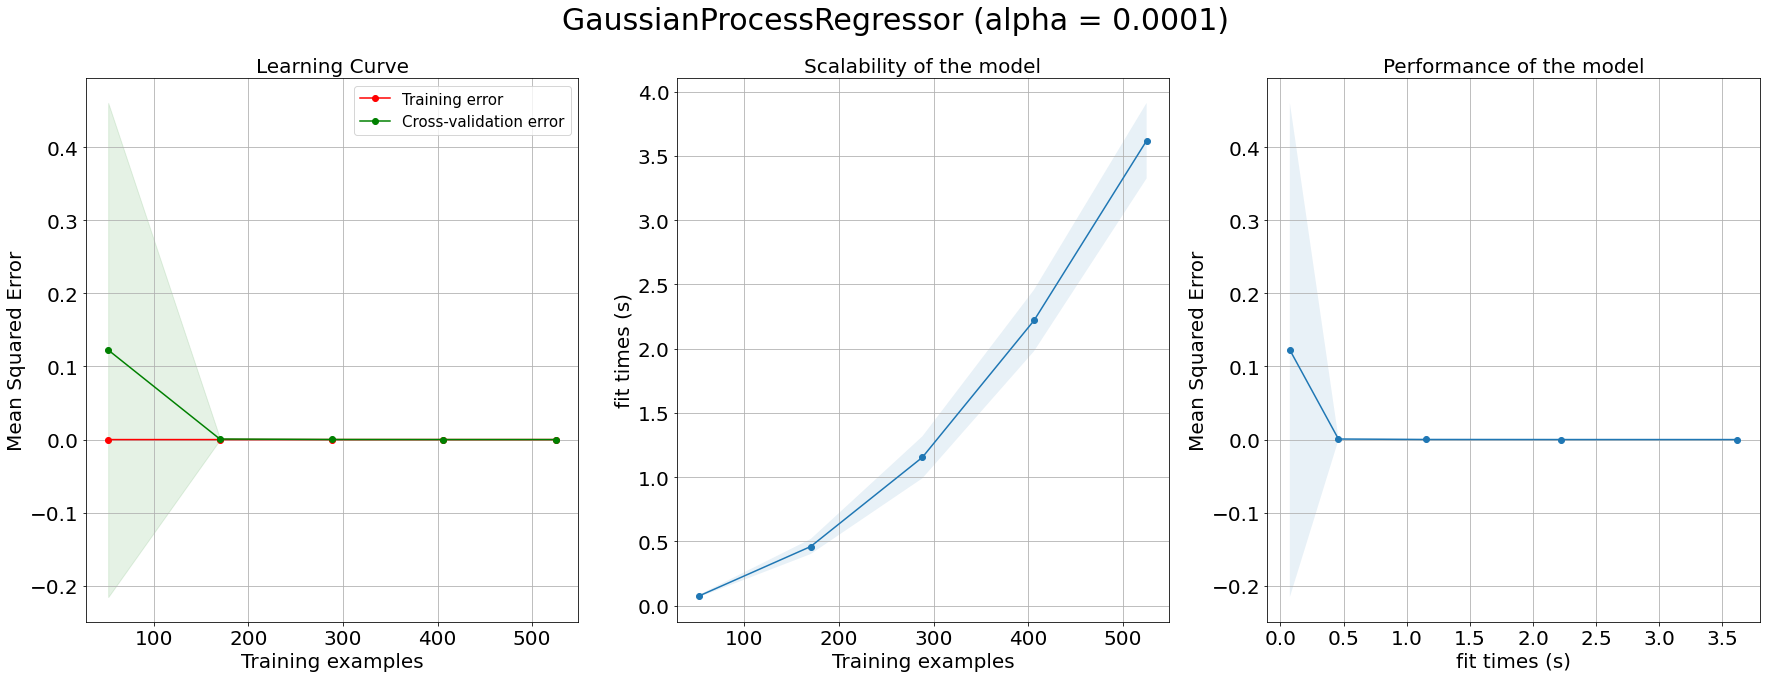

In [48]:
%%time
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 25% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.25, random_state=0)

estimator = GaussianProcessRegressor(alpha=0.0001)
plot_learning_curve(estimator, X = x , y=y ,cv=cv)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.rc('axes',labelsize=20)
plt.rc('axes',titlesize=20)
plt.rc('legend',fontsize=15)
plt.suptitle(r"GaussianProcessRegressor (alpha = 0.0001)",fontsize=30)
plt.savefig('gpr_learning_curves.jpg',dpi=500)

## Final fitting with best hyperparameters

In [49]:
gpr= GaussianProcessRegressor(alpha=0.0001)

In [50]:
%%time
gpr.fit(x_train,y_train)

Wall time: 3.59 s


GaussianProcessRegressor(alpha=0.0001)

In [51]:
%%time
y_pred_gpr = gpr.predict(x_test)

Wall time: 1.3 s


In [52]:
MSEScore = mean_squared_error(y_test, y_pred_gpr)
print(f"mean squared_error metric: {MSEScore}")
print()
##
r2Score = r2_score(y_test, y_pred_gpr)
print(f"r^2 metric: {r2Score}")
print()
##
rmsScore = mean_squared_error(y_test, y_pred_gpr, squared=False)
print(f"root mean squared_error metric: {rmsScore}")
print()
##
MAEScore = mean_absolute_error(y_test, y_pred_gpr)
print(f"mean absolute error metric: {MAEScore}")

mean squared_error metric: 6.908323140289139e-06

r^2 metric: 0.9999982584375166

root mean squared_error metric: 0.0026283689125176355

mean absolute error metric: 0.00048778214155567254


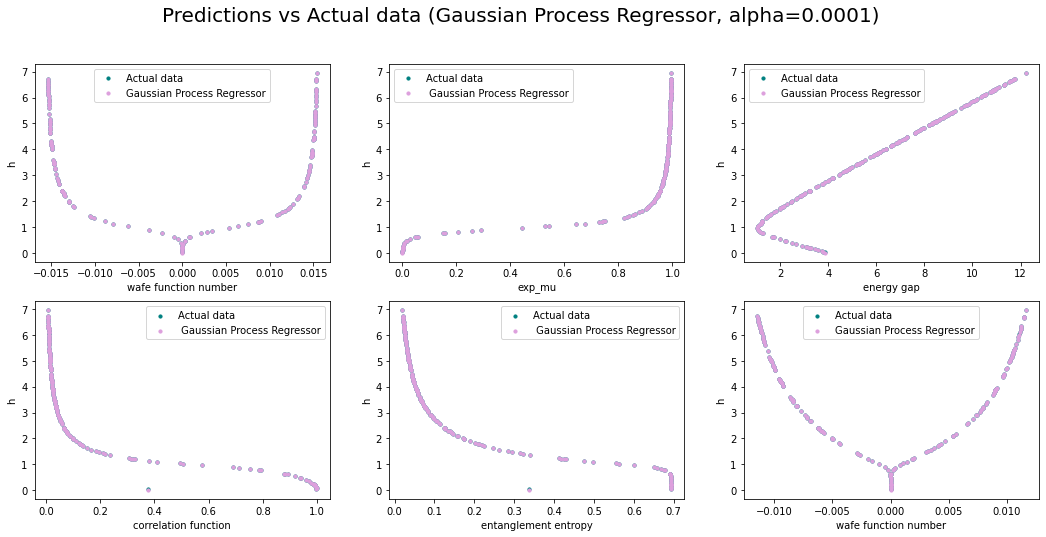

In [54]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes[0][0].scatter(x_test[:,300],y_test,s=10,label="Actual data",c='teal')
axes[0][0].scatter(x_test[:,300],y_pred_gpr,s=10, label="Gaussian Process Regressor", c = 'plum')
axes[0][0].legend()
axes[0][0].set_xlabel('wafe function number')
axes[0][0].set_ylabel('h')
axes[1][0].scatter(x_test[:,20],y_test,s=10,label="Actual data",c='teal')
axes[1][0].scatter(x_test[:,20],y_pred_gpr,s=10, label=" Gaussian Process Regressor", c = 'plum')
axes[1][0].legend()
axes[1][0].set_xlabel('correlation function')
axes[1][0].set_ylabel('h')
axes[0][1].scatter(x_test[:,70],y_test,s=10,label="Actual data",c='teal')
axes[0][1].scatter(x_test[:,70],y_pred_gpr,s=10, label=" Gaussian Process Regressor", c = 'plum')
axes[0][1].legend()
axes[0][1].set_xlabel('exp_mu')
axes[0][1].set_ylabel('h')
axes[1][1].scatter(x_test[:,88],y_test,s=10,label="Actual data",c='teal')
axes[1][1].scatter(x_test[:,88],y_pred_gpr,s=10, label=" Gaussian Process Regressor", c = 'plum')
axes[1][1].legend()
axes[1][1].set_xlabel('entanglement entropy')
axes[1][1].set_ylabel('h')
axes[0][2].scatter(x_test[:,78],y_test,s=10,label="Actual data",c='teal')
axes[0][2].scatter(x_test[:,78],y_pred_gpr,s=10, label="Gaussian Process Regressor", c = 'plum')
axes[0][2].legend()
axes[0][2].set_xlabel('energy gap')
axes[0][2].set_ylabel('h')
axes[1][2].scatter(x_test[:,3500],y_test,s=10,label="Actual data",c='teal')
axes[1][2].scatter(x_test[:,3500],y_pred_gpr,s=10, label="Gaussian Process Regressor", c = 'plum')
axes[1][2].legend()
axes[1][2].set_xlabel('wafe function number')
axes[1][2].set_ylabel('h')
fig.suptitle("Predictions vs Actual data (Gaussian Process Regressor, alpha=0.0001)",fontsize = 20)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.rc('axes',labelsize=10)
plt.rc('axes',titlesize=10)
plt.rc('legend',fontsize=10)
plt.savefig('true_pred_gpr_best.jpg',dpi=500)

# Model 4: Kernel ridge regression

## Training

In [55]:
from sklearn.kernel_ridge import KernelRidge
KRR = KernelRidge(alpha=1)

In [56]:
%%time
KRR.fit(x_train,y_train)

Wall time: 447 ms


KernelRidge()

In [57]:
%%time
y_pred_KRR = KRR.predict(x_test)

Wall time: 68 ms


## Evaluation

In [58]:
MSEScore = mean_squared_error(y_test,y_pred_KRR)
print(f"mean squared error metric: {MSEScore}")
print()
##
r2Score = r2_score(y_test,y_pred_KRR)
print(f"r^2 metric: {r2Score}")
print()
##
rmsScore = mean_squared_error(y_test, y_pred_KRR, squared=False)
print(f"root mean squared_error metric: {rmsScore}")
print()
##
MAEScore = mean_absolute_error(y_test, y_pred_KRR)
print(f"mean absolute error metric: {MAEScore}")

mean squared error metric: 0.011441650353443421

r^2 metric: 0.99711560264335

root mean squared_error metric: 0.10696565034366604

mean absolute error metric: 0.037655060899978506


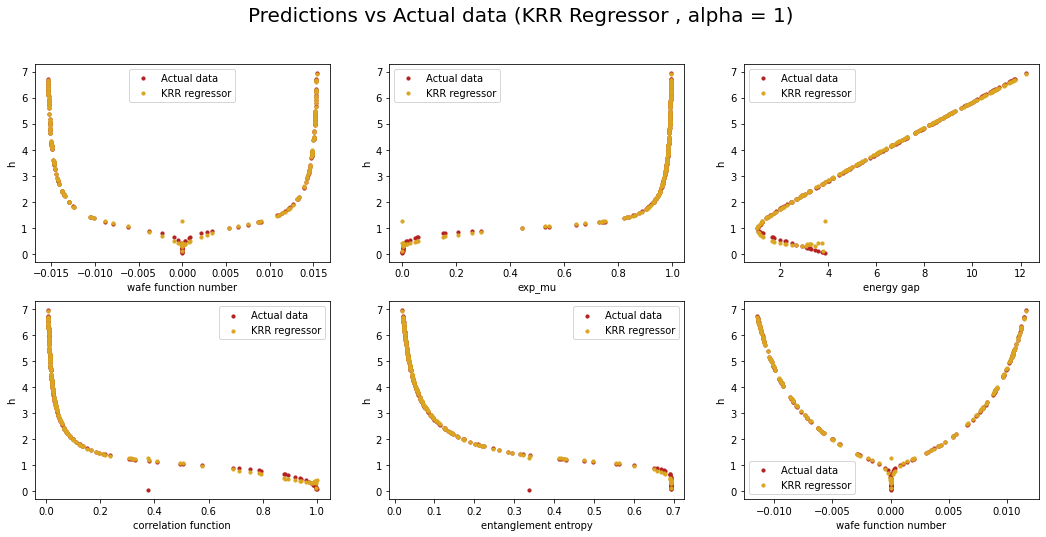

In [60]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes[0][0].scatter(x_test[:,300],y_test,s=10,label="Actual data",c='firebrick')
axes[0][0].scatter(x_test[:,300],y_pred_KRR,s=10, label="KRR regressor", c = 'goldenrod')
axes[0][0].legend()
axes[0][0].set_xlabel('wafe function number')
axes[0][0].set_ylabel('h')
##
axes[1][0].scatter(x_test[:,20],y_test,s=10,label="Actual data",c='firebrick')
axes[1][0].scatter(x_test[:,20],y_pred_KRR,s=10, label="KRR regressor", c = 'goldenrod')
axes[1][0].legend()
axes[1][0].set_xlabel('correlation function')
axes[1][0].set_ylabel('h')
##
axes[0][1].scatter(x_test[:,70],y_test,s=10,label="Actual data",c='firebrick')
axes[0][1].scatter(x_test[:,70],y_pred_KRR,s=10, label="KRR regressor", c = 'goldenrod')
axes[0][1].legend()
axes[0][1].set_xlabel('exp_mu')
axes[0][1].set_ylabel('h')
##
axes[1][1].scatter(x_test[:,88],y_test,s=10,label="Actual data",c='firebrick')
axes[1][1].scatter(x_test[:,88],y_pred_KRR,s=10, label="KRR regressor", c = 'goldenrod')
axes[1][1].legend()
axes[1][1].set_xlabel('entanglement entropy')
axes[1][1].set_ylabel('h')
##
axes[0][2].scatter(x_test[:,78],y_test,s=10,label="Actual data",c='firebrick')
axes[0][2].scatter(x_test[:,78],y_pred_KRR,s=10, label="KRR regressor", c = 'goldenrod')
axes[0][2].legend()
axes[0][2].set_xlabel('energy gap')
axes[0][2].set_ylabel('h')
##
axes[1][2].scatter(x_test[:,3500],y_test,s=10,label="Actual data",c='firebrick')
axes[1][2].scatter(x_test[:,3500],y_pred_KRR,s=10, label="KRR regressor", c = 'goldenrod')
axes[1][2].legend()
axes[1][2].set_xlabel('wafe function number')
axes[1][2].set_ylabel('h')
fig.suptitle("Predictions vs Actual data (KRR Regressor , alpha = 1)",fontsize = 20)
plt.savefig('true_pred_krr.jpg',dpi=500)

## Tuning the complexity of KRR Regressor with validation curve

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    8.9s finished


Wall time: 9.9 s


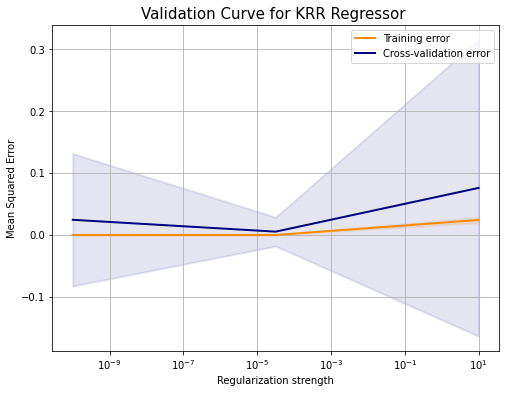

In [130]:
%%time
from sklearn.model_selection import validation_curve
alpha_list = np.logspace(-10, 1, 3)
train_scores, test_scores = validation_curve(KernelRidge(), x, y, 
                                              param_name="alpha",
                                              param_range= alpha_list , cv=20, 
                                              scoring = 'neg_mean_squared_error',
                                              verbose=1)
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.grid()
plt.title("Validation Curve for KRR Regressor ",fontsize = 15)
plt.xlabel(r"Regularization strength")
plt.ylabel("Mean Squared Error")

lw = 2
plt.semilogx(alpha_list, train_scores_mean, label="Training error",
             color="darkorange", lw=lw)
plt.fill_between(alpha_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="darkorange", lw=lw)
plt.semilogx(alpha_list, test_scores_mean, label="Cross-validation error",
             color="navy", lw=lw)
plt.fill_between(alpha_list, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.savefig('krr_validation curve.jpg',dpi=500)

## Grid search to find the best hyperparameters

In [73]:
%%time
from sklearn.model_selection import GridSearchCV
params = [{'kernel': ['laplacian','linear','rbf'],
                     'alpha': [1e-5*1, 1e-5*2, 1e-5*3, 1e-5*4, 1e-5*5, 1e-5*6, 1e-5*7, 1e-5*8, 1e-5*9]}]
krr = KernelRidge()
krr_gs = GridSearchCV(krr, param_grid=params, cv=10, scoring='neg_mean_squared_error')
krr_gs.fit(x_train, y_train)
print("Best Parameters found on development set:")
print()
print( krr_gs.best_params_ )

Best Parameters found on development set:

{'alpha': 1e-05, 'kernel': 'rbf'}
Wall time: 5min 27s


In [74]:
gridsearch_krr  = pd.DataFrame(krr_gs.cv_results_)
gridsearch_krr 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,2.961290,0.235246,0.347150,0.008785,1e-05,laplacian,"{'alpha': 1e-05, 'kernel': 'laplacian'}",-7.996872e-07,-0.000008,-0.000002,-0.000147,-0.000019,-0.000044,-3.360906e-07,-0.000004,-0.021910,-8.942464e-07,-0.002214,0.006566,2
1,0.072445,0.005293,0.014079,0.001338,1e-05,linear,"{'alpha': 1e-05, 'kernel': 'linear'}",-5.259479e-06,-0.000006,-0.000010,-0.000105,-0.000008,-0.000012,-5.608190e-06,-0.000012,-0.032297,-2.328116e-06,-0.003246,0.009684,13
2,0.091040,0.007128,0.025428,0.001596,1e-05,rbf,"{'alpha': 1e-05, 'kernel': 'rbf'}",-7.058954e-06,-0.000012,-0.000012,-0.000066,-0.000053,-0.000029,-9.196867e-06,-0.000016,-0.016063,-9.063095e-06,-0.001628,0.004812,1
3,3.007031,0.037348,0.374161,0.016549,2e-05,laplacian,"{'alpha': 2e-05, 'kernel': 'laplacian'}",-8.464082e-07,-0.000008,-0.000002,-0.000152,-0.000021,-0.000054,-7.647358e-07,-0.000004,-0.021953,-9.758221e-07,-0.002220,0.006578,3
4,0.075196,0.003877,0.014489,0.001550,2e-05,linear,"{'alpha': 2e-05, 'kernel': 'linear'}",-5.956725e-06,-0.000006,-0.000011,-0.000096,-0.000003,-0.000012,-5.879362e-06,-0.000012,-0.036707,-2.507033e-06,-0.003686,0.011007,15
5,0.092811,0.007002,0.025761,0.001977,2e-05,rbf,"{'alpha': 2e-05, 'kernel': 'rbf'}",-1.387395e-05,-0.000032,-0.000025,-0.000142,-0.000116,-0.000057,-1.868481e-05,-0.000029,-0.025092,-1.741925e-05,-0.002554,0.007513,11
6,3.158146,0.305763,0.379823,0.049301,3e-05,laplacian,"{'alpha': 3.0000000000000004e-05, 'kernel': 'l...",-8.910531e-07,-0.000009,-0.000002,-0.000157,-0.000023,-0.000062,-1.411236e-06,-0.000004,-0.021996,-1.059583e-06,-0.002226,0.006590,4
7,0.079140,0.007639,0.015823,0.002056,3e-05,linear,"{'alpha': 3.0000000000000004e-05, 'kernel': 'l...",-6.591067e-06,-0.000006,-0.000011,-0.000089,-0.000003,-0.000013,-6.166899e-06,-0.000013,-0.038390,-2.704775e-06,-0.003854,0.011512,16
8,0.104464,0.022661,0.029098,0.004712,3e-05,rbf,"{'alpha': 3.0000000000000004e-05, 'kernel': 'r...",-2.524189e-05,-0.000059,-0.000044,-0.000233,-0.000193,-0.000092,-3.176681e-05,-0.000049,-0.030999,-2.748839e-05,-0.003175,0.009275,12
9,3.422378,0.628910,0.387049,0.031305,4e-05,laplacian,"{'alpha': 4e-05, 'kernel': 'laplacian'}",-9.345934e-07,-0.000009,-0.000002,-0.000161,-0.000025,-0.000069,-2.243928e-06,-0.000004,-0.022038,-1.145778e-06,-0.002231,0.006602,5


## Learning Curve

Wall time: 1min 26s


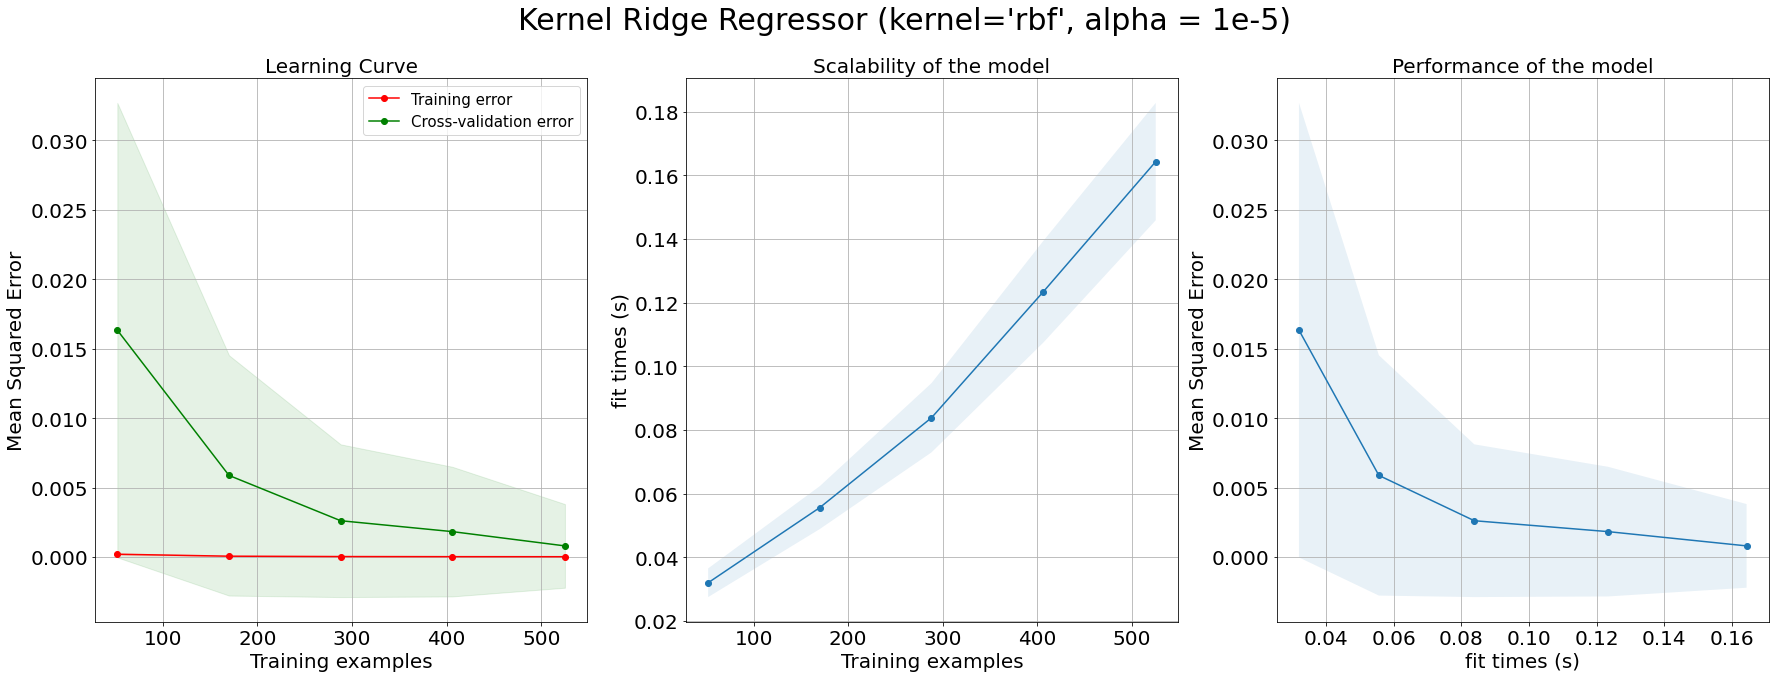

In [76]:
%%time
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 25% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.25, random_state=0)

estimator = KernelRidge(alpha = 1e-5 ,kernel='rbf')
plot_learning_curve(estimator, X = x , y=y ,cv=cv)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.rc('axes',labelsize=20)
plt.rc('axes',titlesize=20)
plt.rc('legend',fontsize=15)
plt.suptitle(r"Kernel Ridge Regressor (kernel='rbf', alpha = 1e-5)",fontsize=30)
plt.savefig('krr_learning_curves.jpg',dpi=500)

## Final fitting with best hyperparameters

In [77]:
KRR = KernelRidge(alpha = 1e-5 ,kernel='rbf')

In [78]:
%%time
KRR.fit(x_train,y_train)

Wall time: 99.9 ms


KernelRidge(alpha=1e-05, kernel='rbf')

In [79]:
%%time
y_pred_KRR = KRR.predict(x_test)

Wall time: 53 ms


In [80]:
MSEScore = mean_squared_error(y_test,y_pred_KRR)
print(f"mean squared error metric: {MSEScore}")
print()
##
r2Score = r2_score(y_test,y_pred_KRR)
print(f"r^2 metric: {r2Score}")
print()
##
rmsScore = mean_squared_error(y_test, y_pred_KRR, squared=False)
print(f"root mean squared_error metric: {rmsScore}")
print()
##
MAEScore = mean_absolute_error(y_test, y_pred_KRR)
print(f"mean absolute error metric: {MAEScore}")

mean squared error metric: 2.759289839034798e-05

r^2 metric: 0.9999930439332858

root mean squared_error metric: 0.005252894286995311

mean absolute error metric: 0.0023599035499206516


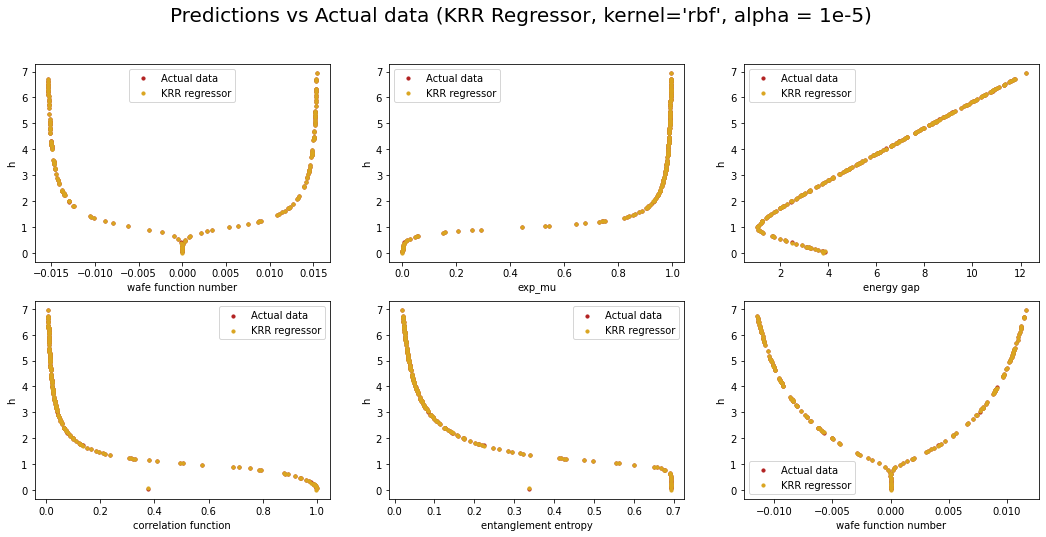

In [87]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes[0][0].scatter(x_test[:,300],y_test,s=10,label="Actual data",c='firebrick')
axes[0][0].scatter(x_test[:,300],y_pred_KRR,s=10, label="KRR regressor", c = 'goldenrod')
axes[0][0].legend()
axes[0][0].set_xlabel('wafe function number')
axes[0][0].set_ylabel('h')
##
axes[1][0].scatter(x_test[:,20],y_test,s=10,label="Actual data",c='firebrick')
axes[1][0].scatter(x_test[:,20],y_pred_KRR,s=10, label="KRR regressor", c = 'goldenrod')
axes[1][0].legend()
axes[1][0].set_xlabel('correlation function')
axes[1][0].set_ylabel('h')
##
axes[0][1].scatter(x_test[:,70],y_test,s=10,label="Actual data",c='firebrick')
axes[0][1].scatter(x_test[:,70],y_pred_KRR,s=10, label="KRR regressor", c = 'goldenrod')
axes[0][1].legend()
axes[0][1].set_xlabel('exp_mu')
axes[0][1].set_ylabel('h')
##
axes[1][1].scatter(x_test[:,88],y_test,s=10,label="Actual data",c='firebrick')
axes[1][1].scatter(x_test[:,88],y_pred_KRR,s=10, label="KRR regressor", c = 'goldenrod')
axes[1][1].legend()
axes[1][1].set_xlabel('entanglement entropy')
axes[1][1].set_ylabel('h')
##
axes[0][2].scatter(x_test[:,78],y_test,s=10,label="Actual data",c='firebrick')
axes[0][2].scatter(x_test[:,78],y_pred_KRR,s=10, label="KRR regressor", c = 'goldenrod')
axes[0][2].legend()
axes[0][2].set_xlabel('energy gap')
axes[0][2].set_ylabel('h')
##
axes[1][2].scatter(x_test[:,3500],y_test,s=10,label="Actual data",c='firebrick')
axes[1][2].scatter(x_test[:,3500],y_pred_KRR,s=10, label="KRR regressor", c = 'goldenrod')
axes[1][2].legend()
axes[1][2].set_xlabel('wafe function number')
axes[1][2].set_ylabel('h')

plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.rc('axes',labelsize=10)
plt.rc('axes',titlesize=10)
plt.rc('legend',fontsize=10)
fig.suptitle("Predictions vs Actual data (KRR Regressor, kernel='rbf', alpha = 1e-5)",fontsize = 20)
plt.savefig('true_pred_krr_best.jpg',dpi=500)

# Model 5: Support Vector Regression

## Training

In [275]:
from sklearn.svm import SVR
support_vector_reg = SVR(kernel='rbf', C=100, gamma=0.001, epsilon=.1)

In [276]:
%%time
support_vector_reg.fit(x_train,y_train)

Wall time: 329 ms


SVR(C=100, gamma=0.001)

In [277]:
%%time 
y_pred_SVR = support_vector_reg.predict(x_test)

Wall time: 24.9 ms


## Evaluation

In [278]:
MSEScore = mean_squared_error(y_test,y_pred_SVR)
print(f"mean squared error metric: {MSEScore}")
print()
##
r2Score = r2_score(y_test,y_pred_SVR)
print(f"r^2 metric: {r2Score}")
print()
##
rmsScore = mean_squared_error(y_test, y_pred_SVR, squared=False)
print(f"root mean squared_error metric: {rmsScore}")
print()
##
MAEScore = mean_absolute_error(y_test, y_pred_SVR)
print(f"mean absolute error metric: {MAEScore}")

mean squared error metric: 0.006703599259513763

r^2 metric: 0.9983100476428767

root mean squared_error metric: 0.08187551074352918

mean absolute error metric: 0.07201957735955325


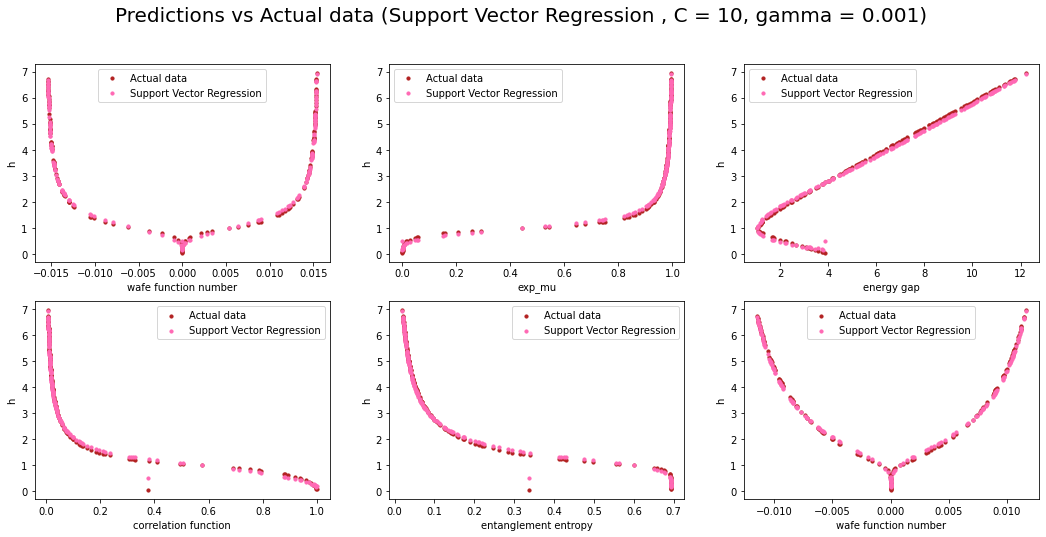

In [279]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes[0][0].scatter(x_test[:,300],y_test,s=10,label="Actual data",c='firebrick')
axes[0][0].scatter(x_test[:,300],y_pred_SVR,s=10, label="Support Vector Regression", c = 'hotpink')
axes[0][0].legend()
axes[0][0].set_xlabel('wafe function number')
axes[0][0].set_ylabel('h')
##
axes[1][0].scatter(x_test[:,20],y_test,s=10,label="Actual data",c='firebrick')
axes[1][0].scatter(x_test[:,20],y_pred_SVR,s=10, label="Support Vector Regression", c = 'hotpink')
axes[1][0].legend()
axes[1][0].set_xlabel('correlation function')
axes[1][0].set_ylabel('h')
##
axes[0][1].scatter(x_test[:,70],y_test,s=10,label="Actual data",c='firebrick')
axes[0][1].scatter(x_test[:,70],y_pred_SVR,s=10, label="Support Vector Regression", c = 'hotpink')
axes[0][1].legend()
axes[0][1].set_xlabel('exp_mu')
axes[0][1].set_ylabel('h')
##
axes[1][1].scatter(x_test[:,88],y_test,s=10,label="Actual data",c='firebrick')
axes[1][1].scatter(x_test[:,88],y_pred_SVR,s=10, label="Support Vector Regression", c = 'hotpink')
axes[1][1].legend()
axes[1][1].set_xlabel('entanglement entropy')
axes[1][1].set_ylabel('h')
##
axes[0][2].scatter(x_test[:,78],y_test,s=10,label="Actual data",c='firebrick')
axes[0][2].scatter(x_test[:,78],y_pred_SVR,s=10, label="Support Vector Regression", c = 'hotpink')
axes[0][2].legend()
axes[0][2].set_xlabel('energy gap')
axes[0][2].set_ylabel('h')
##
axes[1][2].scatter(x_test[:,3500],y_test,s=10,label="Actual data",c='firebrick')
axes[1][2].scatter(x_test[:,3500],y_pred_SVR,s=10, label="Support Vector Regression", c = 'hotpink')
axes[1][2].legend()
axes[1][2].set_xlabel('wafe function number')
axes[1][2].set_ylabel('h')
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.rc('axes',labelsize=10)
plt.rc('axes',titlesize=10)
plt.rc('legend',fontsize=10)
fig.suptitle("Predictions vs Actual data (Support Vector Regression , C = 10, gamma = 0.001)",fontsize = 20)
plt.savefig('true_pred_svr.jpg',dpi=500)

## Tuning the complexity of Support Vector Regression with validation curve

Wall time: 4min 18s


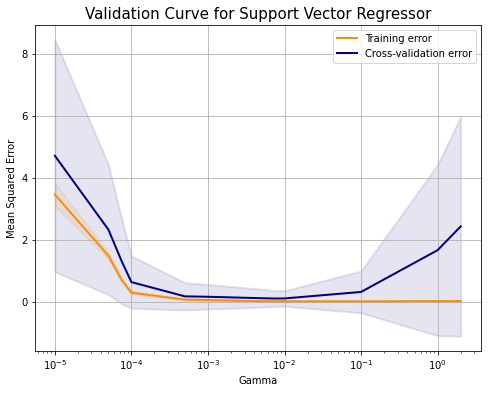

In [132]:
%%time
from sklearn.model_selection import validation_curve
gamma_list = [0.00001,0.00005,0.000075,0.0001,0.0005,0.00075,0.001,0.005,0.0075,0.01,0.1,1,2]
train_scores, test_scores = validation_curve(SVR(), x, y, 
                                              param_name="gamma",
                                              param_range=gamma_list , cv=10, 
                                              scoring = 'neg_mean_squared_error',
                                              n_jobs=1)
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.grid()
plt.title("Validation Curve for Support Vector Regressor",fontsize = 15)
plt.xlabel(r"Gamma")
plt.ylabel("Mean Squared Error")

lw = 2
plt.semilogx(gamma_list, train_scores_mean, label="Training error",
             color="darkorange", lw=lw)
plt.fill_between(gamma_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="darkorange", lw=lw)
plt.semilogx(gamma_list, test_scores_mean, label="Cross-validation error",
             color="navy", lw=lw)
plt.fill_between(gamma_list, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.savefig('SVR_validation curve.jpg',dpi=500)

## Grid search to find best hyper-parameters

In [133]:
from sklearn.model_selection import GridSearchCV
gamma_list = [0.00001,0.00005,0.000075,0.0001,0.0005,0.00075,0.001,0.005,0.0075,0.01,1,2]
params = {'gamma':gamma_list}
svr = SVR()
svr_gs = GridSearchCV(svr, param_grid=params, n_jobs=1, cv=10, scoring='neg_mean_squared_error')
svr_gs.fit(x_train, y_train)
print("Best Gamma found on development set:")
print()
print( svr_gs.best_params_ )

Best Gamma found on development set:

{'gamma': 0.01}


In [140]:
gridsearch_SVR = pd.DataFrame(svr_gs.cv_results_)
gridsearch_SVR

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.163650,0.032491,0.124925,0.007603,1e-05,{'gamma': 1e-05},-2.874811,-4.281333,-3.158053,-4.068365,-3.564555,-4.278564,-4.029438,-3.719718,-3.730649,-3.046828,-3.675231,0.482879,12
1,1.291258,0.209030,0.136526,0.015325,5e-05,{'gamma': 5e-05},-1.518131,-2.389794,-1.680336,-2.314484,-2.000238,-2.356429,-2.257106,-2.025558,-2.105455,-1.677701,-2.032523,0.297227,11
2,1.153293,0.030050,0.126769,0.004374,7.5e-05,{'gamma': 7.5e-05},-0.896615,-1.495139,-0.999691,-1.481717,-1.261469,-1.459092,-1.417339,-1.239762,-1.338439,-1.032483,-1.262175,0.206623,10
3,1.115344,0.069853,0.123885,0.010728,0.0001,{'gamma': 0.0001},-0.447304,-0.822299,-0.506303,-0.844996,-0.702602,-0.787745,-0.775810,-0.659806,-0.762464,-0.549138,-0.685847,0.133072,9
4,0.469453,0.013025,0.047540,0.005520,0.0005,{'gamma': 0.0005},-0.021425,-0.060386,-0.036564,-0.113179,-0.105710,-0.063059,-0.020562,-0.082243,-0.155627,-0.047088,-0.070584,0.041479,8
5,0.430088,0.034079,0.039698,0.003871,0.00075,{'gamma': 0.00075},-0.020630,-0.049508,-0.030663,-0.098178,-0.091652,-0.054761,-0.015685,-0.070693,-0.143593,-0.039779,-0.061514,0.038026,7
6,0.396490,0.031533,0.033535,0.005557,0.001,{'gamma': 0.001},-0.019991,-0.042291,-0.026780,-0.088132,-0.081392,-0.049975,-0.012925,-0.064278,-0.133753,-0.033262,-0.055278,0.035402,6
7,0.255875,0.028871,0.021104,0.001663,0.005,{'gamma': 0.005},-0.005804,-0.009010,-0.007726,-0.018814,-0.016016,-0.009701,-0.005067,-0.012447,-0.076111,-0.005170,-0.016587,0.020318,3
8,0.227995,0.014910,0.017655,0.001554,0.0075,{'gamma': 0.0075},-0.005618,-0.005533,-0.006079,-0.011416,-0.009247,-0.006593,-0.006112,-0.007627,-0.068245,-0.004570,-0.013104,0.018480,2
9,0.210949,0.010654,0.017251,0.002639,0.01,{'gamma': 0.01},-0.005510,-0.004782,-0.005827,-0.008528,-0.006924,-0.005890,-0.006313,-0.006300,-0.065268,-0.004498,-0.011984,0.017793,1


## Learning Curve

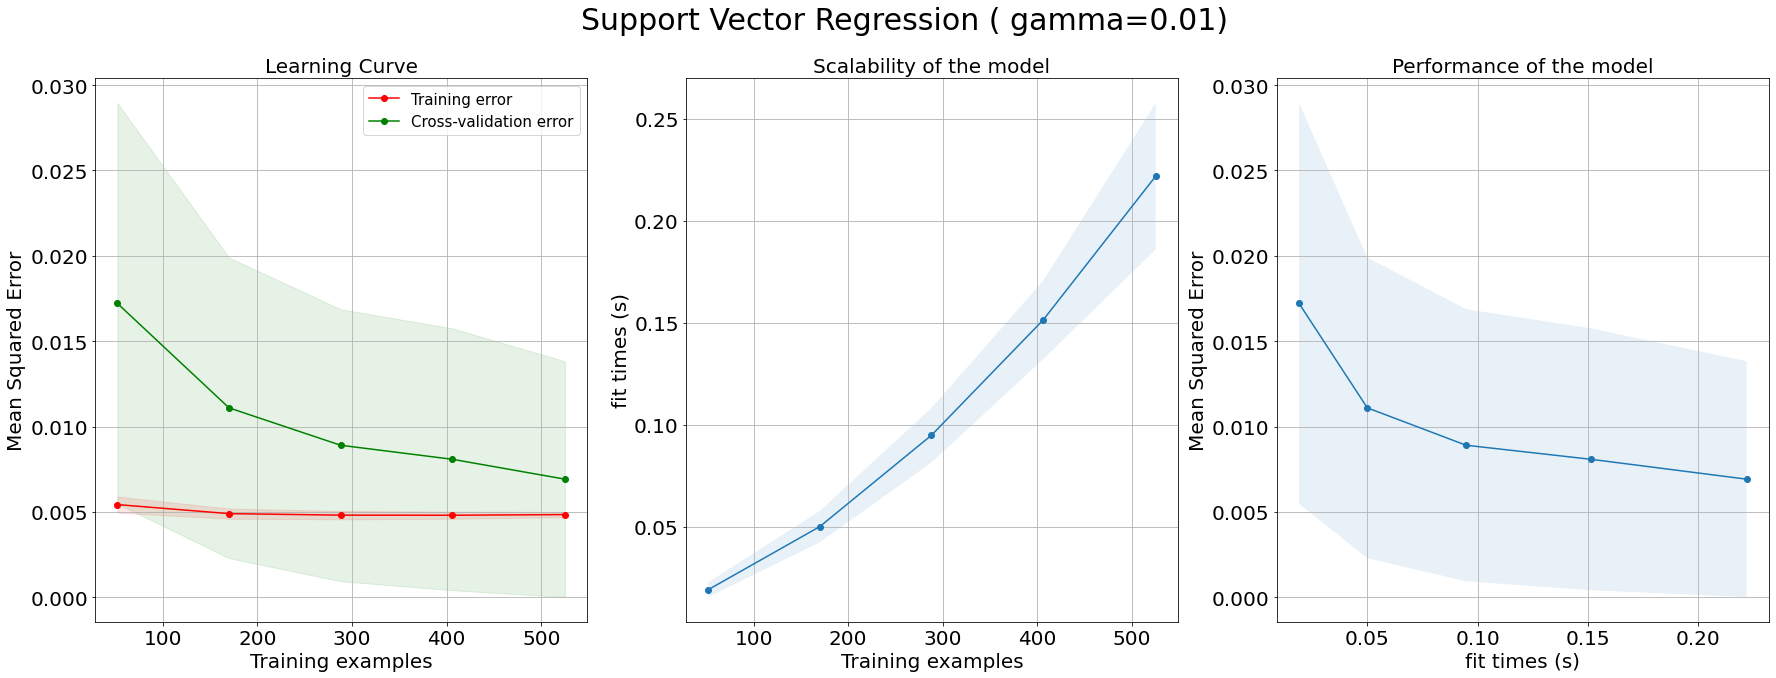

In [283]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 25% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.25, random_state=0)

estimator = SVR(kernel='rbf', C=100, gamma=0.01, epsilon=.1)
plot_learning_curve(estimator, X = x , y=y ,cv=cv)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.rc('axes',labelsize=20)
plt.rc('axes',titlesize=20)
plt.rc('legend',fontsize=15)
plt.suptitle(r"Support Vector Regression ( gamma=0.01)",fontsize=30)
plt.savefig('svr_learning_curves.jpg',dpi=500)

## Final fitting with best hyperparameters

In [284]:
from sklearn.svm import SVR
support_vector_reg = SVR(kernel='rbf', C=100, gamma=0.01, epsilon=.1)

In [285]:
%%time
support_vector_reg.fit(x_train,y_train)

Wall time: 162 ms


SVR(C=100, gamma=0.01)

In [286]:
%%time 
y_pred_SVR = support_vector_reg.predict(x_test)

Wall time: 19.9 ms


In [287]:
MSEScore = mean_squared_error(y_test,y_pred_SVR)
print(f"mean squared error metric: {MSEScore}")
print()
##
r2Score = r2_score(y_test,y_pred_SVR)
print(f"r^2 metric: {r2Score}")
print()
##
rmsScore = mean_squared_error(y_test, y_pred_SVR, squared=False)
print(f"root mean squared_error metric: {rmsScore}")
print()
##
MAEScore = mean_absolute_error(y_test, y_pred_SVR)
print(f"mean absolute error metric: {MAEScore}")

mean squared error metric: 0.00477574786889055

r^2 metric: 0.9987960517841808

root mean squared_error metric: 0.06910678598293044

mean absolute error metric: 0.06195280684065266


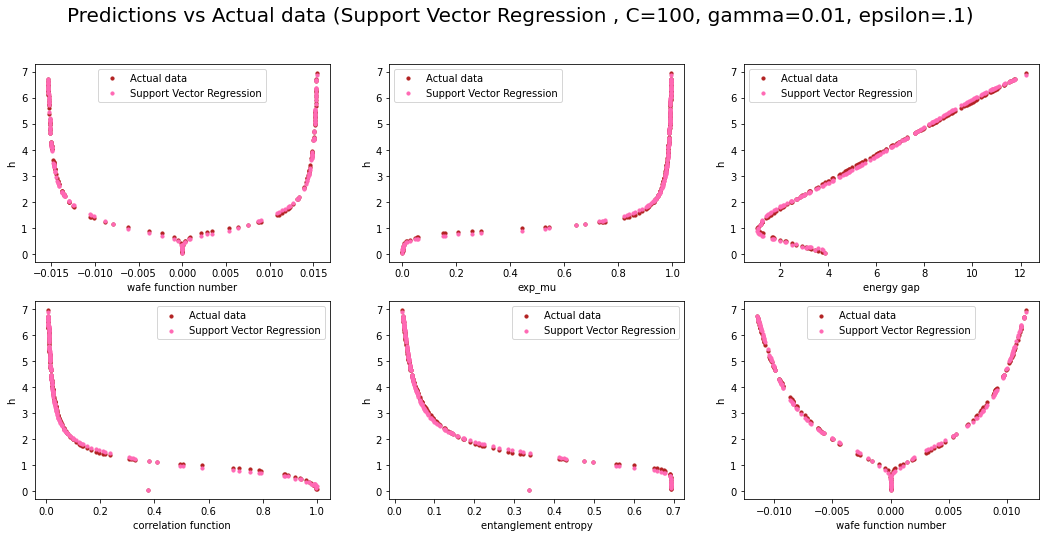

In [289]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes[0][0].scatter(x_test[:,300],y_test,s=10,label="Actual data",c='firebrick')
axes[0][0].scatter(x_test[:,300],y_pred_SVR,s=10, label="Support Vector Regression", c = 'hotpink')
axes[0][0].legend()
axes[0][0].set_xlabel('wafe function number')
axes[0][0].set_ylabel('h')
##
axes[1][0].scatter(x_test[:,20],y_test,s=10,label="Actual data",c='firebrick')
axes[1][0].scatter(x_test[:,20],y_pred_SVR,s=10, label="Support Vector Regression", c = 'hotpink')
axes[1][0].legend()
axes[1][0].set_xlabel('correlation function')
axes[1][0].set_ylabel('h')
##
axes[0][1].scatter(x_test[:,70],y_test,s=10,label="Actual data",c='firebrick')
axes[0][1].scatter(x_test[:,70],y_pred_SVR,s=10, label="Support Vector Regression", c = 'hotpink')
axes[0][1].legend()
axes[0][1].set_xlabel('exp_mu')
axes[0][1].set_ylabel('h')
##
axes[1][1].scatter(x_test[:,88],y_test,s=10,label="Actual data",c='firebrick')
axes[1][1].scatter(x_test[:,88],y_pred_SVR,s=10, label="Support Vector Regression", c = 'hotpink')
axes[1][1].legend()
axes[1][1].set_xlabel('entanglement entropy')
axes[1][1].set_ylabel('h')
##
axes[0][2].scatter(x_test[:,78],y_test,s=10,label="Actual data",c='firebrick')
axes[0][2].scatter(x_test[:,78],y_pred_SVR,s=10, label="Support Vector Regression", c = 'hotpink')
axes[0][2].legend()
axes[0][2].set_xlabel('energy gap')
axes[0][2].set_ylabel('h')
##
axes[1][2].scatter(x_test[:,3500],y_test,s=10,label="Actual data",c='firebrick')
axes[1][2].scatter(x_test[:,3500],y_pred_SVR,s=10, label="Support Vector Regression", c = 'hotpink')
axes[1][2].legend()
axes[1][2].set_xlabel('wafe function number')
axes[1][2].set_ylabel('h')
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.rc('axes',labelsize=10)
plt.rc('axes',titlesize=10)
plt.rc('legend',fontsize=10)
fig.suptitle("Predictions vs Actual data (Support Vector Regression , C=100, gamma=0.01, epsilon=.1)",fontsize = 20)
plt.savefig('true_pred_svr_best.jpg',dpi=500)

# Model 6: Linear Regressor

## Training

In [104]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(fit_intercept=True, normalize=False)

In [105]:
%%time
LR.fit(x_train,y_train)

Wall time: 282 ms


LinearRegression()

In [106]:
%%time
y_pred_LR = LR.predict(x_test)

Wall time: 3.29 ms


In [107]:
MSEScore = mean_squared_error(y_test, y_pred_LR)
print(f"mean squared_error metric: {MSEScore}")
print()
##
r2Score = r2_score(y_test, y_pred_LR)
print(f"r^2 metric: {r2Score}")
print()
##
rmsScore = mean_squared_error(y_test, y_pred_LR, squared=False)
print(f"root mean squared_error metric: {rmsScore}")
print()
##
MAEScore = mean_absolute_error(y_test, y_pred_LR)
print(f"mean absolute error metric: {MAEScore}")

mean squared_error metric: 184.54604323088054

r^2 metric: -45.52336881760917

root mean squared_error metric: 13.584772476227952

mean absolute error metric: 1.3262342064895412


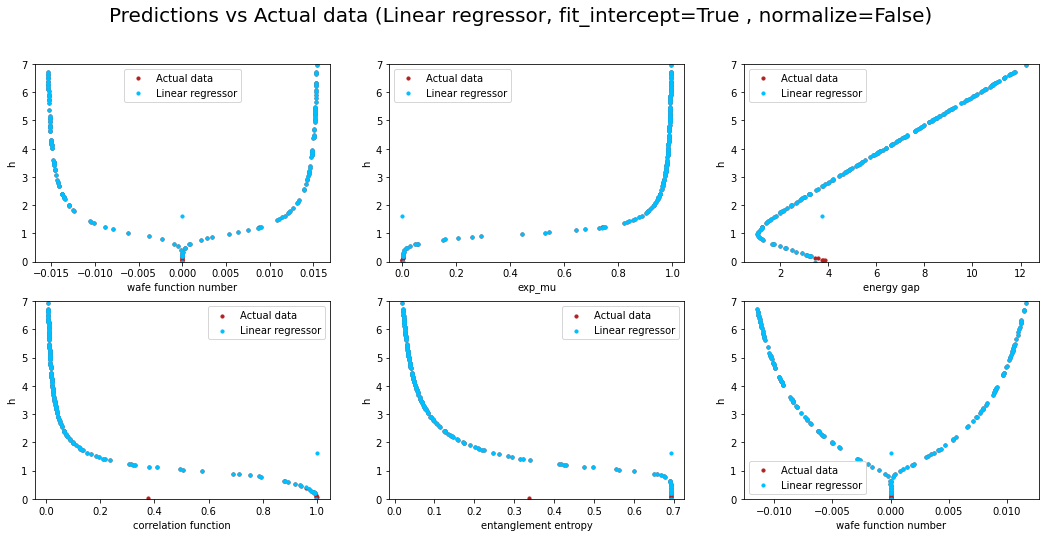

In [108]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes[0][0].scatter(x_test[:,300],y_test,s=10,label="Actual data",c='firebrick')
axes[0][0].scatter(x_test[:,300],y_pred_LR,s=10, label="Linear regressor", c = 'deepskyblue')
axes[0][0].legend()
axes[0][0].set_xlabel('wafe function number')
axes[0][0].set_ylabel('h')
axes[0][0].set_ylim(0,7)
##
axes[1][0].scatter(x_test[:,20],y_test,s=10,label="Actual data",c='firebrick')
axes[1][0].scatter(x_test[:,20],y_pred_LR,s=10, label="Linear regressor", c = 'deepskyblue')
axes[1][0].legend()
axes[1][0].set_xlabel('correlation function')
axes[1][0].set_ylabel('h')
axes[1][0].set_ylim(0,7)
##
axes[0][1].scatter(x_test[:,70],y_test,s=10,label="Actual data",c='firebrick')
axes[0][1].scatter(x_test[:,70],y_pred_LR,s=10, label="Linear regressor", c = 'deepskyblue')
axes[0][1].legend()
axes[0][1].set_xlabel('exp_mu')
axes[0][1].set_ylabel('h')
axes[0][1].set_ylim(0,7)
##
axes[1][1].scatter(x_test[:,88],y_test,s=10,label="Actual data",c='firebrick')
axes[1][1].scatter(x_test[:,88],y_pred_LR,s=10, label="Linear regressor", c = 'deepskyblue')
axes[1][1].legend()
axes[1][1].set_xlabel('entanglement entropy')
axes[1][1].set_ylabel('h')
axes[1][1].set_ylim(0,7)
##
axes[0][2].scatter(x_test[:,78],y_test,s=10,label="Actual data",c='firebrick')
axes[0][2].scatter(x_test[:,78],y_pred_LR,s=10, label="Linear regressor", c = 'deepskyblue')
axes[0][2].legend()
axes[0][2].set_xlabel('energy gap')
axes[0][2].set_ylabel('h')
axes[0][2].set_ylim(0,7)
##
axes[1][2].scatter(x_test[:,3500],y_test,s=10,label="Actual data",c='firebrick')
axes[1][2].scatter(x_test[:,3500],y_pred_LR,s=10, label="Linear regressor", c = 'deepskyblue')
axes[1][2].legend()
axes[1][2].set_xlabel('wafe function number')
axes[1][2].set_ylabel('h')
axes[1][2].set_ylim(0,7)
fig.suptitle("Predictions vs Actual data (Linear regressor, fit_intercept=True , normalize=False)",fontsize = 20)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.rc('axes',labelsize=10)
plt.rc('axes',titlesize=10)
plt.rc('legend',fontsize=10)
plt.savefig('true_pred_lr.jpg',dpi=500)

## Grid search to find the best fit_intercept and normalize

In [116]:
%%time
from sklearn.model_selection import GridSearchCV
parameters = [{'fit_intercept': ['True','False'] , 'normalize': ['True','False']}]
lr_gs = GridSearchCV(LinearRegression(), param_grid=parameters, scoring= 'neg_mean_squared_error', cv=6)
lr_gs.fit(x_train, y_train)
print("Best Parameters found on development set:")
print()
print(lr_gs.best_params_)

Best Parameters found on development set:

{'fit_intercept': 'True', 'normalize': 'True'}
Wall time: 6.95 s


In [117]:
gridsearch_lr  = pd.DataFrame(lr_gs.cv_results_)
gridsearch_lr 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_fit_intercept,param_normalize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
0,0.272358,0.013600,0.002568,0.001283,True,True,"{'fit_intercept': 'True', 'normalize': 'True'}",-0.009264,-0.000004,-110.784396,-0.00507,-0.14217,-2340.474908,-408.569302,864.9203,1
1,0.264703,0.010881,0.002688,0.002925,True,False,"{'fit_intercept': 'True', 'normalize': 'False'}",-0.009264,-0.000004,-110.784396,-0.00507,-0.14217,-2340.474908,-408.569302,864.9203,1
2,0.267442,0.004681,0.004043,0.002854,False,True,"{'fit_intercept': 'False', 'normalize': 'True'}",-0.009264,-0.000004,-110.784396,-0.00507,-0.14217,-2340.474908,-408.569302,864.9203,1
3,0.269758,0.007791,0.003353,0.001294,False,False,"{'fit_intercept': 'False', 'normalize': 'False'}",-0.009264,-0.000004,-110.784396,-0.00507,-0.14217,-2340.474908,-408.569302,864.9203,1


Wall time: 1min 50s


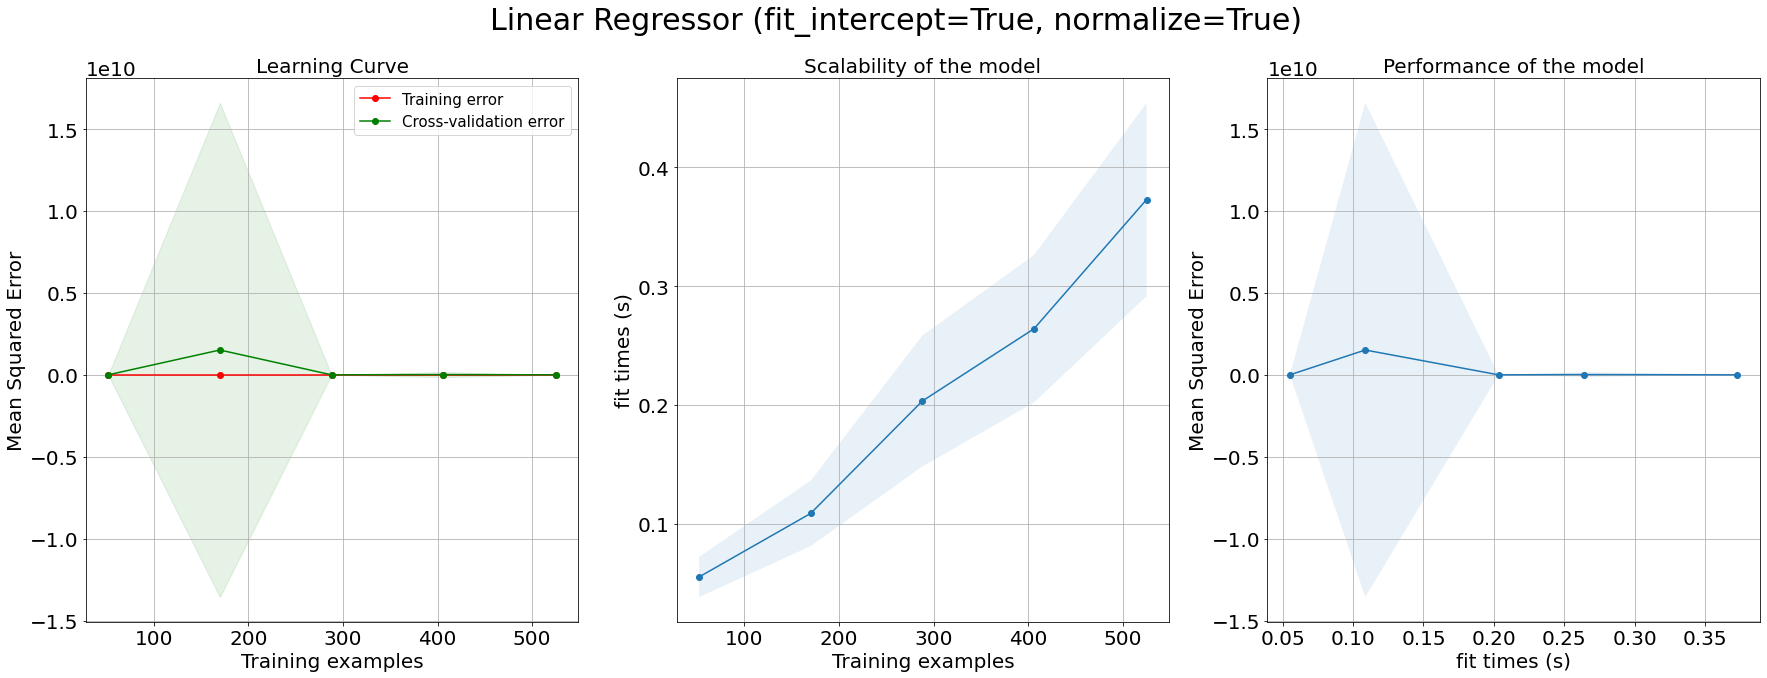

In [119]:
%%time
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 25% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.25, random_state=0)

estimator = LinearRegression(fit_intercept=True, normalize=True)
plot_learning_curve(estimator, X = x , y=y ,cv=cv)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.rc('axes',labelsize=20)
plt.rc('axes',titlesize=20)
plt.rc('legend',fontsize=15)
plt.suptitle(r"Linear Regressor (fit_intercept=True, normalize=True)",fontsize=30)
plt.savefig('LR_learning_curves.jpg',dpi=500)

## Set limitation for y axis to in order to read bias better

Wall time: 2min 15s


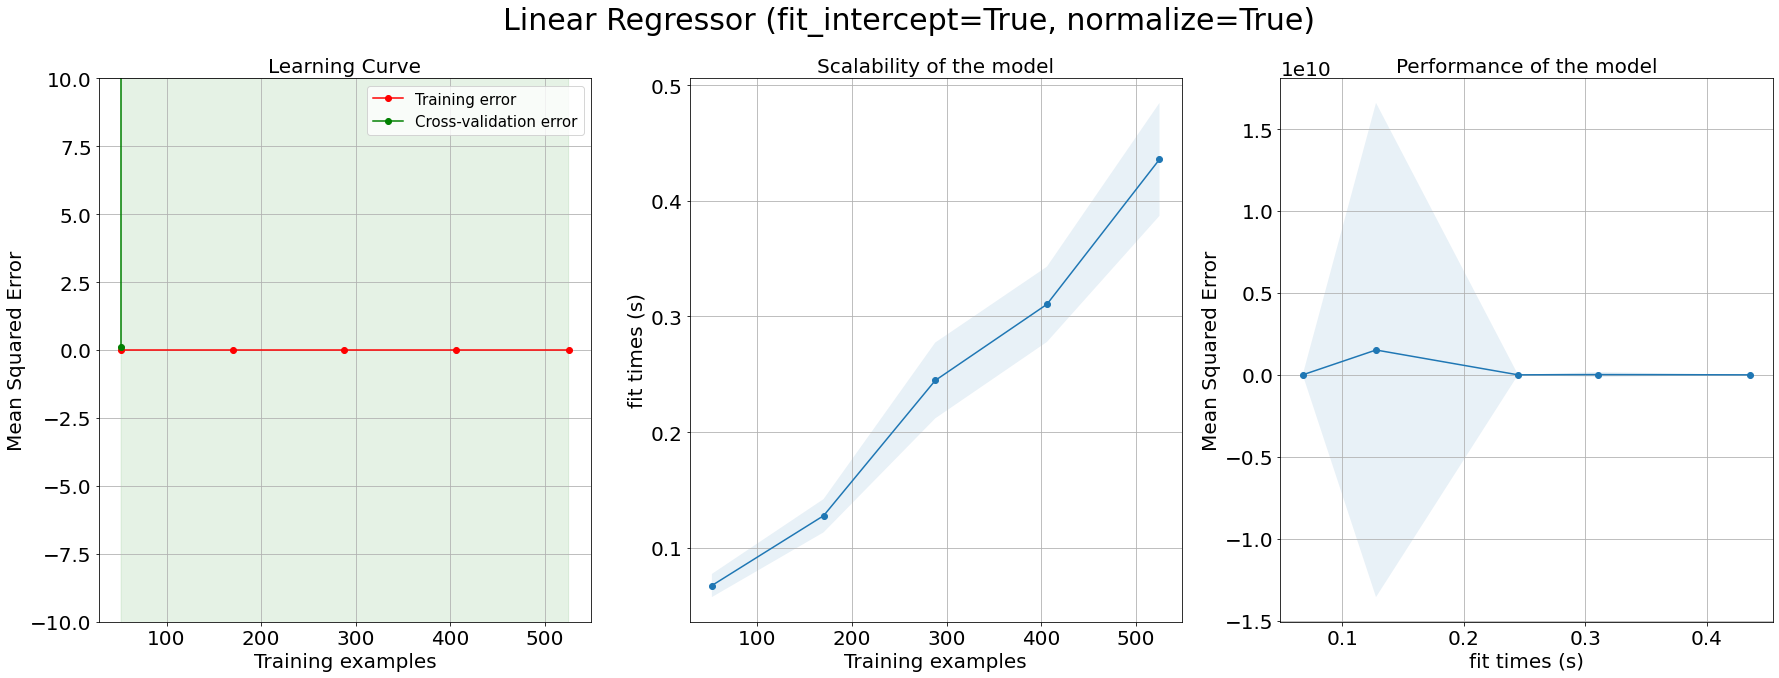

In [294]:
%%time
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 25% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.25, random_state=0)

estimator = LinearRegression(fit_intercept=True, normalize=True)
plot_learning_curve(estimator, X = x , y=y ,cv=cv,ylim = (-1e1, 1e1) )
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.rc('axes',labelsize=20)
plt.rc('axes',titlesize=20)
plt.rc('legend',fontsize=15)
plt.suptitle(r"Linear Regressor (fit_intercept=True, normalize=True)",fontsize=30)
plt.savefig('LR_learning_curves.jpg',dpi=500)

Wall time: 58.9 s


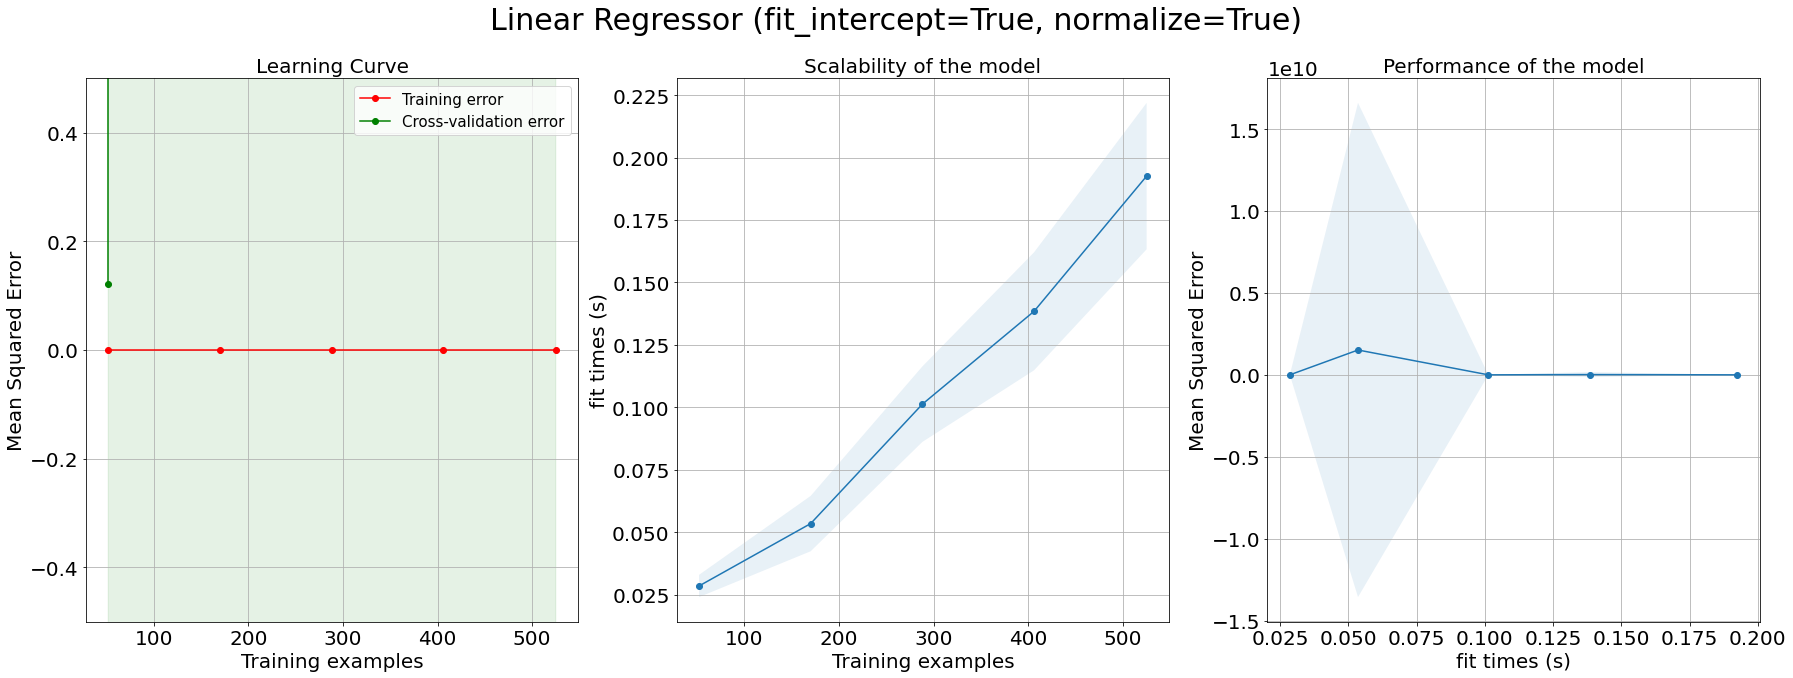

In [295]:
%%time
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 25% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.25, random_state=0)

estimator = LinearRegression(fit_intercept=True, normalize=True)
plot_learning_curve(estimator, X = x , y=y ,cv=cv,ylim = (-0.5, 0.5) )
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.rc('axes',labelsize=20)
plt.rc('axes',titlesize=20)
plt.rc('legend',fontsize=15)
plt.suptitle(r"Linear Regressor (fit_intercept=True, normalize=True)",fontsize=30)
plt.savefig('LR_learning_curves.jpg',dpi=500)

## Final fitting with best hyperparameters

In [166]:
LR = LinearRegression(fit_intercept=True, normalize=True)

In [167]:
%%time
LR.fit(x_train,y_train)

Wall time: 179 ms


LinearRegression(normalize=True)

In [168]:
%%time
y_pred_LR = LR.predict(x_test)

Wall time: 6.98 ms


In [169]:
MSEScore = mean_squared_error(y_test, y_pred_LR)
print(f"mean squared_error metric: {MSEScore}")
print()
##
r2Score = r2_score(y_test, y_pred_LR)
print(f"r^2 metric: {r2Score}")
print()
##
rmsScore = mean_squared_error(y_test, y_pred_LR, squared=False)
print(f"root mean squared_error metric: {rmsScore}")
print()
##
MAEScore = mean_absolute_error(y_test, y_pred_LR)
print(f"mean absolute error metric: {MAEScore}")

mean squared_error metric: 4.777422425097701

r^2 metric: -0.20437036518995666

root mean squared_error metric: 2.185731553758993

mean absolute error metric: 0.2593441094500626


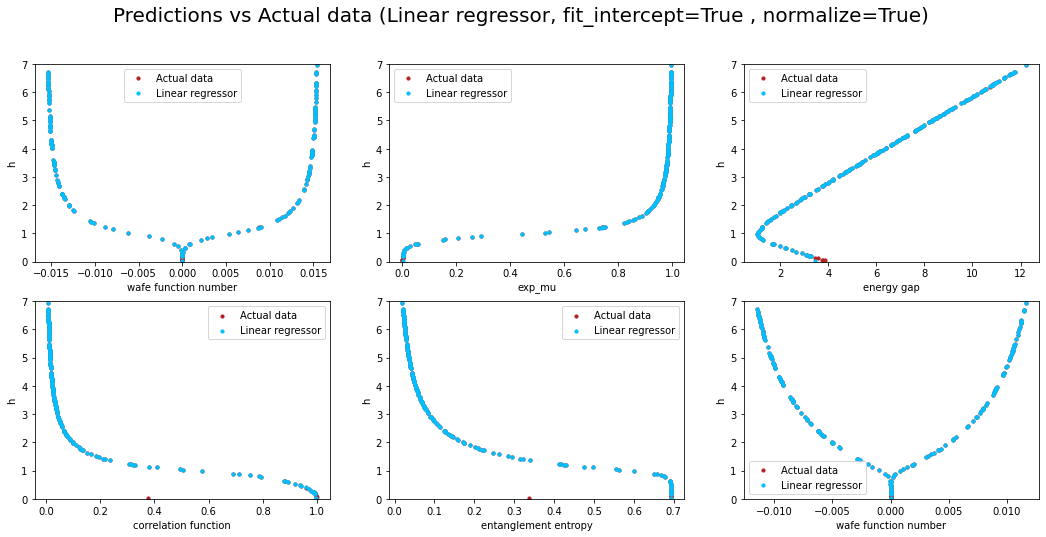

In [170]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes[0][0].scatter(x_test[:,300],y_test,s=10,label="Actual data",c='firebrick')
axes[0][0].scatter(x_test[:,300],y_pred_LR,s=10, label="Linear regressor", c = 'deepskyblue')
axes[0][0].legend()
axes[0][0].set_xlabel('wafe function number')
axes[0][0].set_ylabel('h')
axes[0][0].set_ylim(0,7)
##
axes[1][0].scatter(x_test[:,20],y_test,s=10,label="Actual data",c='firebrick')
axes[1][0].scatter(x_test[:,20],y_pred_LR,s=10, label="Linear regressor", c = 'deepskyblue')
axes[1][0].legend()
axes[1][0].set_xlabel('correlation function')
axes[1][0].set_ylabel('h')
axes[1][0].set_ylim(0,7)
##
axes[0][1].scatter(x_test[:,70],y_test,s=10,label="Actual data",c='firebrick')
axes[0][1].scatter(x_test[:,70],y_pred_LR,s=10, label="Linear regressor", c = 'deepskyblue')
axes[0][1].legend()
axes[0][1].set_xlabel('exp_mu')
axes[0][1].set_ylabel('h')
axes[0][1].set_ylim(0,7)
##
axes[1][1].scatter(x_test[:,88],y_test,s=10,label="Actual data",c='firebrick')
axes[1][1].scatter(x_test[:,88],y_pred_LR,s=10, label="Linear regressor", c = 'deepskyblue')
axes[1][1].legend()
axes[1][1].set_xlabel('entanglement entropy')
axes[1][1].set_ylabel('h')
axes[1][1].set_ylim(0,7)
##
axes[0][2].scatter(x_test[:,78],y_test,s=10,label="Actual data",c='firebrick')
axes[0][2].scatter(x_test[:,78],y_pred_LR,s=10, label="Linear regressor", c = 'deepskyblue')
axes[0][2].legend()
axes[0][2].set_xlabel('energy gap')
axes[0][2].set_ylabel('h')
axes[0][2].set_ylim(0,7)
##
axes[1][2].scatter(x_test[:,3500],y_test,s=10,label="Actual data",c='firebrick')
axes[1][2].scatter(x_test[:,3500],y_pred_LR,s=10, label="Linear regressor", c = 'deepskyblue')
axes[1][2].legend()
axes[1][2].set_xlabel('wafe function number')
axes[1][2].set_ylabel('h')
axes[1][2].set_ylim(0,7)
fig.suptitle("Predictions vs Actual data (Linear regressor, fit_intercept=True , normalize=True)",fontsize = 20)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.rc('axes',labelsize=10)
plt.rc('axes',titlesize=10)
plt.rc('legend',fontsize=10)
plt.savefig('true_pred_lr_best.jpg',dpi=500)

### Final Conclusion about these 6 models in report

# The End :)